<a href="https://colab.research.google.com/github/AndreaRossiUniVR/Massive_Dataset_Extraction_FIGH/blob/main/FIGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download REPO

In [1]:
!git clone https://github.com/AndreaRossiUniVR/Massive_Dataset_Extraction_FIGH.git

Cloning into 'Massive_Dataset_Extraction_FIGH'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 23 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), 4.54 MiB | 8.37 MiB/s, done.


Set Up the Env

In [2]:
import os

os.chdir('./Massive_Dataset_Extraction_FIGH')

In [3]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.0 MB/s eta 0:00:00


Download DATASET


In [4]:
!python download.py

Downloaded and saved Dataset_FIGH/50678.pdf
Downloaded and saved Dataset_FIGH/50679.pdf
Downloaded and saved Dataset_FIGH/50680.pdf
Downloaded and saved Dataset_FIGH/50681.pdf
Downloaded and saved Dataset_FIGH/50682.pdf
Downloaded and saved Dataset_FIGH/50683.pdf
Downloaded and saved Dataset_FIGH/50684.pdf
Downloaded and saved Dataset_FIGH/50685.pdf
Downloaded and saved Dataset_FIGH/50686.pdf
Downloaded and saved Dataset_FIGH/50687.pdf
Downloaded and saved Dataset_FIGH/50688.pdf
Downloaded and saved Dataset_FIGH/50689.pdf
Downloaded and saved Dataset_FIGH/50690.pdf
Downloaded and saved Dataset_FIGH/50691.pdf
Downloaded and saved Dataset_FIGH/50692.pdf
Downloaded and saved Dataset_FIGH/50693.pdf
Downloaded and saved Dataset_FIGH/50694.pdf
Downloaded and saved Dataset_FIGH/50695.pdf
Downloaded and saved Dataset_FIGH/50696.pdf
Downloaded and saved Dataset_FIGH/50697.pdf
Downloaded and saved Dataset_FIGH/50698.pdf
Downloaded and saved Dataset_FIGH/50699.pdf
Downloaded and saved Dataset_FIG

Playground

Single PDF reader

In [ ]:
# PDF reader

from PyPDF2 import PdfReader

def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PdfReader(file)
        num_pages = len(reader.pages)

        for page_number, page in enumerate(reader.pages):
            text = page.extract_text()
            print(f"Page {page_number + 1}:")
            print(text)
            print()

# Provide the path to your PDF file
pdf_file_path = '/content/Massive_Dataset_Extraction_FIGH/Dataset_FIGH/48867.pdf'

read_pdf(pdf_file_path)


Page 1:
FEDERAZIONE ITALIANA GIUOCO HANDBALL
SERIE A1 FEMMINILE  Numero gara 48867  Risultato finale 33 - 22
AJOMI SALERNO BCASALGRANDE PADANA
Località Salerno Impianto PALESTRA PALUMBO Data10/09/2022
AJOMI SALERNO
N°Cognome e Nome Reti Amm. 2' 2' 2' Sq. San.Sq.
2Lolli, Francesca 0
3Stellato, Carmela 1
4Dalla Costa, Ilaria (VK) 5
6Rossomando, Giulia 6
7Calzado De Toro, Maria Nazaret 0
9Squizziato, Rocio Sthefani 4
12Di Giugno, Sara Margherita 0
13Stettler, Lucila Maria 3
14Bajciova, Vladimira 4
15Manojlovic, Ramona Vesna 6
18Napoletano, Giuseppa (K) 2 33:41
19Ciociano, Martina 0
22Chianese, Giada 2
23Pinto Pereira, Daniela Sofia 0
24Lauretti Matos, Cyrielle Paola 0 03:07 06:29
Uff.ATassi, Nahuel Yamil
Uff.BAvram, Elena Laura
Uff.CFreda, Riccardo
Uff.DTelese, Salvatore
Uff.E
BCASALGRANDE PADANA
N°Cognome e Nome Reti Amm. 2' 2' 2' Sq. San.Sq.
1Bonacini, Valentina 0
2Rondoni, Chiara 0
3Mangone, Asia Kristel 0
5Giombetti, Nicole 0
8Franco, Francesca (VK) 7 13:10 45:55
10Furlanetto, Ilenia 

Create DB

In [79]:
import sqlite3

def setup_db():
    # Connect to the SQLite database (or create it if it doesn't exist)
    conn = sqlite3.connect('fighDB.db')

    # Create a cursor object
    c = conn.cursor()

    # Create table for Games
    c.execute('''
    CREATE TABLE Games (
        id INTEGER PRIMARY KEY,
        home_team_id TEXT,
        away_team_id TEXT,
        home_goals INTEGER,
        away_goals INTEGER,
        category TEXT,
        date TEXT
    )
''')

    # Create table for Teams
    c.execute('''
        CREATE TABLE Teams (
            id TEXT PRIMARY KEY,
            team_name TEXT,
            goals INTEGER,
            goals_against INTEGER,
            category TEXT
        )
    ''')

    # Create table for Players
    c.execute('''
    CREATE TABLE Players (
        id TEXT,
        team_id TEXT,
        game_id INTEGER,
        number INTEGER,
        name TEXT,
        goals INTEGER,
        FOREIGN KEY (team_id) REFERENCES Teams (id),
        FOREIGN KEY (game_id) REFERENCES Games (id),
        PRIMARY KEY (id, game_id)
      )
  ''')

    # Commit the changes and close the connection
    conn.commit()
    conn.close()

if __name__ == "__main__":
    setup_db()


Data Cleaning + DB INSERT

In [80]:
!python run_read.py

commit
[['Dataset_FIGH/48933.pdf', '48933', '07/01/2023', 'SERIE A1 FEMMINILE', ''], ['CASALGRANDE PADANA', 24, 35, [{'number': '1', 'name': 'Bonacini, Valentina', 'goals': '0'}, {'number': '2', 'name': 'Rondoni, Elisa', 'goals': '0'}, {'number': '3', 'name': 'Mangone, Asia Kristel', 'goals': '3'}, {'number': '5', 'name': 'Giombetti, Nicole', 'goals': '2'}, {'number': '12', 'name': 'Bordon, Nadia Ayelen', 'goals': '0'}, {'number': '14', 'name': 'Artoni, Simona', 'goals': '0'}, {'number': '15', 'name': 'Rondoni, Chiara', 'goals': '0'}, {'number': '16', 'name': 'Mutti, Caterina Maria', 'goals': '0'}, {'number': '18', 'name': 'Artoni, Alessia', 'goals': '1'}, {'number': '19', 'name': 'Orlandi, Marianna', 'goals': '4'}, {'number': '20', 'name': 'Baroni, Emma', 'goals': '0'}, {'number': '21', 'name': 'Giovannini, Matilde', 'goals': '0'}, {'number': '26', 'name': 'Mattioli, Giulia', 'goals': '1'}, {'number': '33', 'name': 'Lusetti, Gaia', 'goals': '1'}], ''], ['JOMI SALERNO', 35, 24, [{'numb

Exec queries

In [81]:
import sqlite3

def display_team_players_stats(team_id):
    # Connect to the SQLite database
    conn = sqlite3.connect('fighDB.db')
    c = conn.cursor()

    # Retrieve the team name
    c.execute("SELECT team_name FROM Teams WHERE id=?", (team_id,))
    team_name = c.fetchone()
    if team_name is None:
        print("Team not found.")
        return

    # Retrieve the list of players for the team
    c.execute("SELECT name FROM Players WHERE team_id=?", (team_id,))
    players = c.fetchall()

    if not players:
        print(f"No players found for team '{team_name[0]}'")
        return

    print(f"Players for team '{team_name[0]}':")
    for player in players:
        player_name = player[0]
        # Retrieve player's goals per game
        c.execute('''
            SELECT game_id, goals
            FROM Players
            WHERE team_id=? AND name=?
        ''', (team_id, player_name))
        goals_per_game = c.fetchall()

        # Retrieve player's goals per game when the team wins
        c.execute('''
            SELECT p.game_id, p.goals
            FROM Players p
            INNER JOIN Games g ON p.game_id = g.id
            WHERE p.team_id=? AND p.name=? AND ((g.home_team_id=? AND g.home_goals > g.away_goals) OR (g.away_team_id=? AND g.away_goals > g.home_goals))
        ''', (team_id, player_name, team_name[0], team_name[0],))
        goals_per_game_wins = c.fetchall()

        # Retrieve player's goals per game when the team loses
        c.execute('''
            SELECT p.game_id, p.goals
            FROM Players p
            INNER JOIN Games g ON p.game_id = g.id
            WHERE p.team_id=? AND p.name=? AND ((g.home_team_id=? AND g.home_goals < g.away_goals) OR (g.away_team_id=? AND g.away_goals < g.home_goals))
        ''', (team_id, player_name,team_name[0], team_name[0],))
        goals_per_game_losses = c.fetchall()

        print(f"\nPlayer: {player_name}")
        print("Goals per game:")
        total_goals = 0
        for goal in goals_per_game:
            print(f"Game ID: {goal[0]}, Goals: {goal[1]}")
            total_goals += goal[1]
        average_goals = total_goals / len(goals_per_game)
        print(f"\nTotal Goals per game: {average_goals:.2f}")

        print("\nGoals per game when the team wins:")
        total_goals_wins = 0
        for goal in goals_per_game_wins:
            print(f"Game ID: {goal[0]}, Goals: {goal[1]} (Win)")
            total_goals_wins += goal[1]
        average_goals_wins = total_goals_wins / len(goals_per_game_wins) if len(goals_per_game_wins) > 0 else 0
        print(f"\nGoals per Game in W: {average_goals_wins:.2f}")

        print("\nGoals per game when the team loses:")
        total_goals_losses = 0
        for goal in goals_per_game_losses:
            print(f"Game ID: {goal[0]}, Goals: {goal[1]} (Loss)")
            total_goals_losses += goal[1]
        average_goals_losses = total_goals_losses / len(goals_per_game_losses) if len(goals_per_game_losses) > 0 else 0
        print(f"\nGoals per Game in L: {average_goals_losses:.2f}")

    # Close the connection
    conn.close()

display_team_players_stats("MEZZOCORONASERIEA2FEMMINILE")  # Replace "A1" with the desired team ID


Streaming output truncated to the last 5000 lines.
Game ID: 51472, Goals: 9 (Loss)
Game ID: 51436, Goals: 7 (Loss)
Game ID: 51464, Goals: 1 (Loss)
Game ID: 51432, Goals: 0 (Loss)

Goals per Game in L: 4.57

Player: Pedron, Elena
Goals per game:
Game ID: 51456, Goals: 0

Total Goals per game: 0.00

Goals per game when the team wins:

Goals per Game in W: 0.00

Goals per game when the team loses:
Game ID: 51456, Goals: 0 (Loss)

Goals per Game in L: 0.00

Player: Raifer, Hannah
Goals per game:
Game ID: 51428, Goals: 0
Game ID: 51456, Goals: 2
Game ID: 51476, Goals: 7
Game ID: 51460, Goals: 1
Game ID: 51449, Goals: 1
Game ID: 51436, Goals: 1
Game ID: 51420, Goals: 0
Game ID: 51468, Goals: 0
Game ID: 51432, Goals: 1

Total Goals per game: 1.44

Goals per game when the team wins:
Game ID: 51476, Goals: 7 (Win)
Game ID: 51460, Goals: 1 (Win)
Game ID: 51449, Goals: 1 (Win)
Game ID: 51420, Goals: 0 (Win)

Goals per Game in W: 2.25

Goals per game when the team loses:
Game ID: 51428, Goals: 0 (

In [70]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
db_conn = sqlite3.connect('fighDB.db')
c = db_conn.cursor()
team_id ="MEZZOCORONASERIEA2FEMMINILE" 
player_name ="Paoli, Aurora"
team_name = 'MEZZOCORONA'


c.execute('''
            SELECT g.*
            FROM Players p
            INNER JOIN Games g ON p.game_id = g.id
            
        ''') #, (team_id, player_name, team_name, team_name,) WHERE p.team_id=? AND p.name=? AND ((g.home_team_id=? AND g.home_goals < g.away_goals) OR (g.away_team_id=? AND g.away_goals < g.home_goals))

goals_per_game_losses = c.fetchall()

print(team_name)
# Fetch all the results
results = goals_per_game_losses

# Print the results
for row in results:
    print(row)

# Close the connection
db_conn.close()


Streaming output truncated to the last 5000 lines.
(50820, 'TEAMNETWORK ALBATRO', 'RAIMOND SASSARI', None, None, 'SERIE A GOLD MASCHILE', '25/02/2023')
(50742, 'SIDEA GROUP FASANO', 'CONVERSANO', None, None, 'SERIE A GOLD MASCHILE', '16/11/2022')
(60058, 'SPORTINSIEME', 'CONVERSANO', None, None, 'SERIE  A2 FEMMINILE', '19/03/2023')
(60065, 'SPORTINSIEME', 'VITA NUOVA PACECO', None, None, 'SERIE  A2 FEMMINILE', '30/04/2023')
(48928, 'STARMED TMS TERAMO', 'MEZZOCORONA', None, None, 'SERIE A1 FEMMINILE', '10/12/2022')
(48932, 'STARMED TMS TERAMO', 'CELLINI PADOVA', None, None, 'SERIE A1 FEMMINILE', '07/01/2023')
(48940, 'CASSA RURALE PONTINIA', 'STARMED TMS TERAMO', None, None, 'SERIE A1 FEMMINILE', '14/01/2023')
(48947, 'STARMED TMS TERAMO', "ALI' BEST ESPRESSO MESTRINO", None, None, 'SERIE A1 FEMMINILE', '21/01/2023')
(48953, 'JOMI SALERNO', 'STARMED TMS TERAMO', None, None, 'SERIE A1 FEMMINILE', '11/02/2023')
(48957, 'STARMED TMS TERAMO', 'SECURFOX FERRARA', None, None, 'SERIE A1 FEMMI

DATA VISUALIZATION

In [ ]:
!pip install pandas matplotlib seaborn sqlite3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [94]:
import sqlite3
import ipywidgets as widgets
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect('fighDB.db')
c = conn.cursor()

# Retrieve all categories
c.execute("SELECT DISTINCT category FROM Teams")
categories = [category[0] for category in c.fetchall()]

# Create the first dropdown menu for categories
category_dropdown = widgets.Dropdown(
    options=categories,
    description='Category:',
)

# Create a button to confirm the category selection
category_button = widgets.Button(description="Confirm Category")

# Create the second dropdown menu for teams, initially empty
team_dropdown = widgets.Dropdown(
    options=[],
    description='Team:',
)

# Create a button to confirm the team selection
team_button = widgets.Button(description="Confirm Team")

# Create the third dropdown menu for players, initially empty
player_dropdown = widgets.Dropdown(
    options=[],
    description='Player:',
)

# Function to update the team dropdown menu once a category is selected and confirmed
def update_teams(button):
    c.execute("SELECT team_name FROM Teams WHERE category=?", (category_dropdown.value,))
    teams = [team[0] for team in c.fetchall()]
    team_dropdown.options = teams

# Function to update the player dropdown menu once a team is selected and confirmed
def update_players(button):
    team_id = (team_dropdown.value+category_dropdown.value).replace(" ", "")
    c.execute("SELECT name FROM Players WHERE team_id=?", (team_id,))
    players = [player[0] for player in c.fetchall()]
    player_dropdown.options = players

# Set the function to be called when the category button is clicked
category_button.on_click(update_teams)

# Set the function to be called when the team button is clicked
team_button.on_click(update_players)

# Display the dropdown menus and buttons
display(category_dropdown)
display(category_button)
display(team_dropdown)
display(team_button)
display(player_dropdown)

# Do not close the connection yet as we need it for the widget interactions


Dropdown(description='Category:', options=('SERIE A1 FEMMINILE', 'SERIE  A2 FEMMINILE', 'SERIE A GOLD MASCHILE…

Button(description='Confirm Category', style=ButtonStyle())

Dropdown(description='Team:', options=(), value=None)

Button(description='Confirm Team', style=ButtonStyle())

Dropdown(description='Player:', options=(), value=None)

Dropdown(description='Category:', options=('SERIE A1 FEMMINILE', 'SERIE  A2 FEMMINILE', 'SERIE A GOLD MASCHILE…

Dropdown(description='Team:', options=(), value=None)

Dropdown(description='Player:', options=(), value=None)

Button(description='Confirm Category', style=ButtonStyle())

Button(description='Confirm Team', style=ButtonStyle())

Button(description='Confirm Player', style=ButtonStyle())

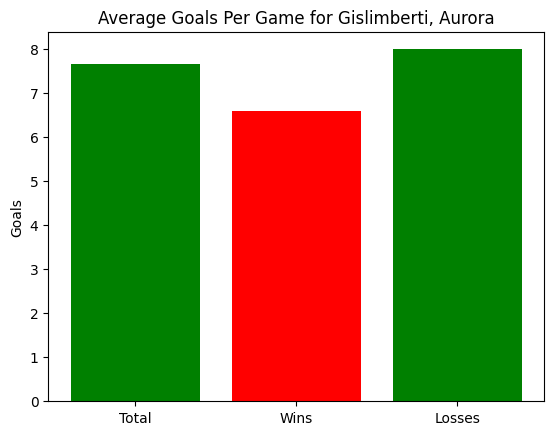

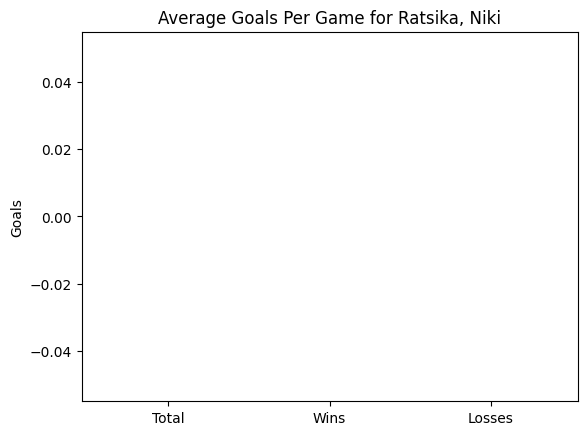

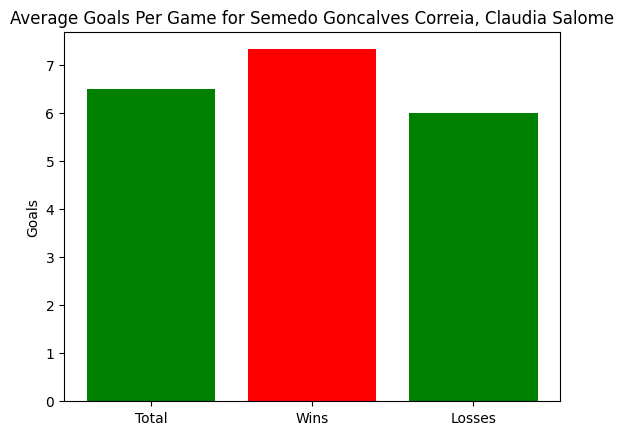

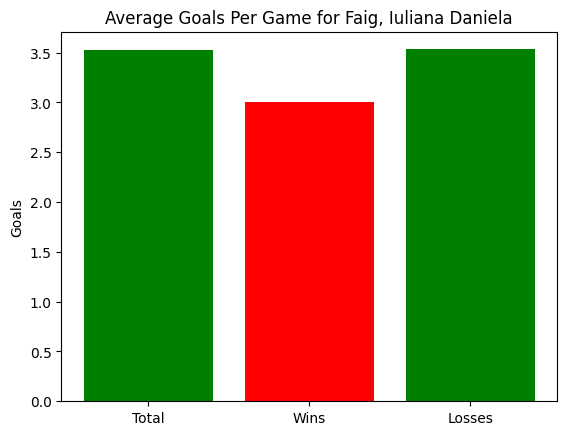

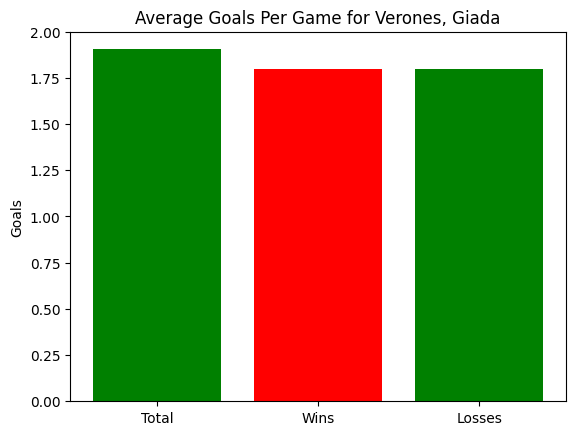

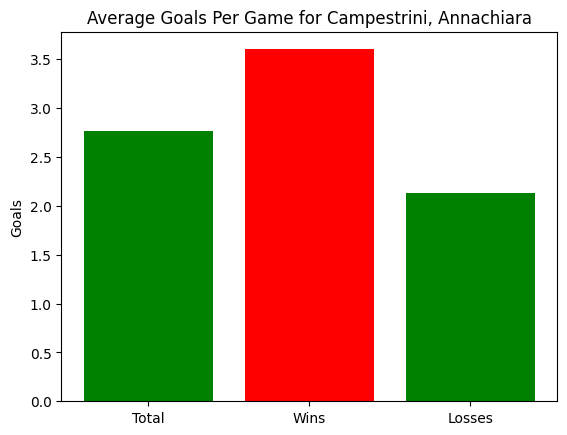

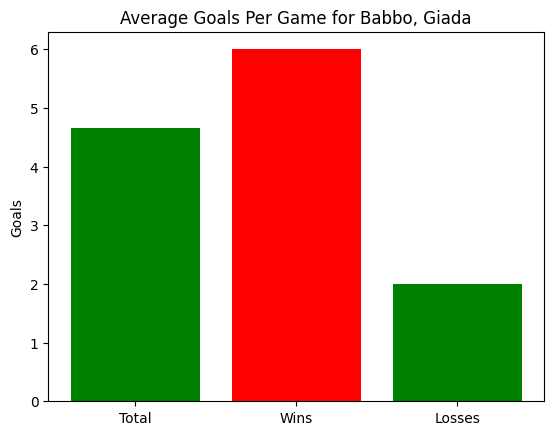

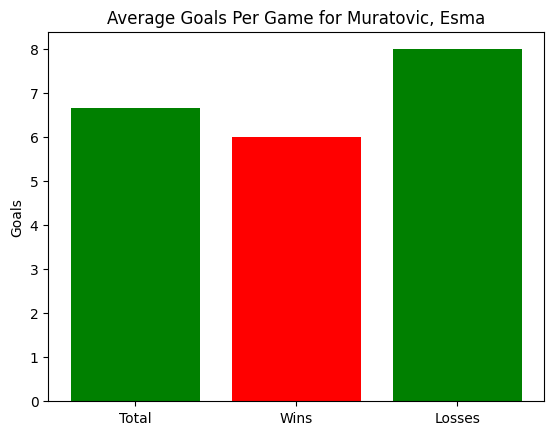

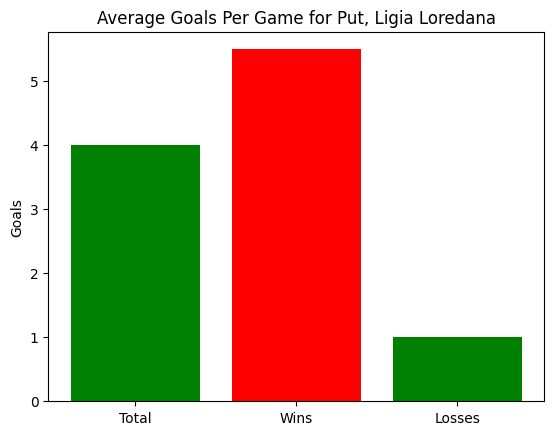

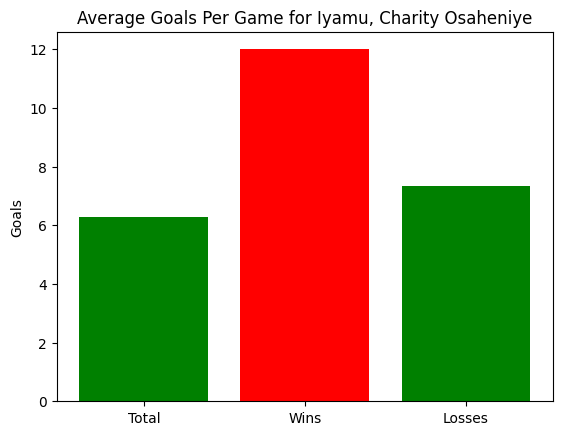

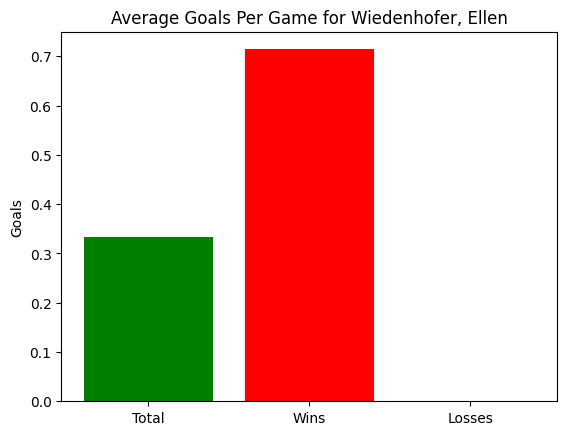

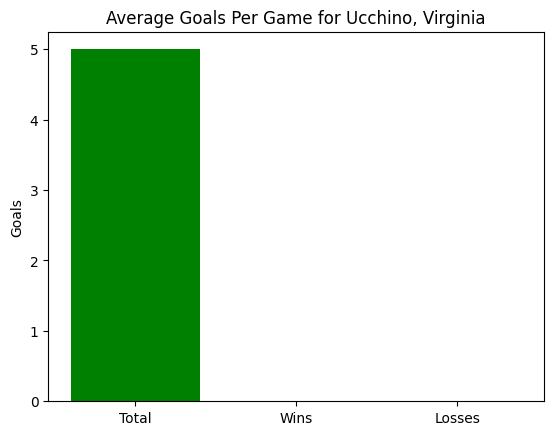

In [105]:
import sqlite3
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('fighDB.db')
c = conn.cursor()

# Get all unique categories
c.execute("SELECT DISTINCT category FROM Teams")
categories = [category[0] for category in c.fetchall()]

# Create the category dropdown menu
category_dropdown = widgets.Dropdown(options=categories, description='Category:')
display(category_dropdown)

# Create the team dropdown menu (empty for now)
team_dropdown = widgets.Dropdown(description='Team:')
display(team_dropdown)

# Create the player dropdown menu (empty for now)
player_dropdown = widgets.Dropdown(description='Player:')
display(player_dropdown)

# Create a button to confirm the category selection
category_button = widgets.Button(description="Confirm Category")
display(category_button)

# Function to update the team dropdown menu once a category is selected and confirmed
def update_teams(button):
    c.execute("SELECT team_name FROM Teams WHERE category=?", (category_dropdown.value,))
    teams = [team[0] for team in c.fetchall()]
    team_dropdown.options = teams

# Set the function to be called when the category button is clicked
category_button.on_click(update_teams)

# Create a button to confirm the team selection
team_button = widgets.Button(description="Confirm Team")
display(team_button)

# Function to update the player dropdown menu once a team is selected and confirmed
def update_players(button):
    team_id = (team_dropdown.value + category_dropdown.value).replace(" ", "")
    c.execute("SELECT name FROM Players WHERE team_id=?", (team_id,))
    players = [player[0] for player in c.fetchall()]
    player_dropdown.options = players

# Set the function to be called when the team button is clicked
team_button.on_click(update_players)

# Function to display the player stats
def display_player_stats(button):
    team_id = (team_dropdown.value + category_dropdown.value).replace(" ", "")
    player_name = player_dropdown.value

    c.execute('''
        SELECT game_id, goals
        FROM Players
        WHERE team_id=? AND name=?
    ''', (team_id, player_name))
    goals_per_game = c.fetchall()

    c.execute('''
        SELECT p.game_id, p.goals
        FROM Players p
        INNER JOIN Games g ON p.game_id = g.id
        WHERE p.team_id=? AND p.name=? AND ((g.home_team_id=? AND g.home_goals > g.away_goals) OR (g.away_team_id=? AND g.away_goals > g.home_goals))
    ''', (team_id, player_name, team_dropdown.value, team_dropdown.value))
    goals_per_game_wins = c.fetchall()

    c.execute('''
        SELECT p.game_id, p.goals
        FROM Players p
        INNER JOIN Games g ON p.game_id = g.id
        WHERE p.team_id=? AND p.name=? AND ((g.home_team_id=? AND g.home_goals < g.away_goals) OR (g.away_team_id=? AND g.away_goals < g.home_goals))
    ''', (team_id, player_name, team_dropdown.value, team_dropdown.value))
    goals_per_game_losses = c.fetchall()

    total_goals = sum(goal[1] for goal in goals_per_game)
    average_goals = total_goals / len(goals_per_game)

    total_goals_wins = sum(goal[1] for goal in goals_per_game_wins)
    average_goals_wins = total_goals_wins / len(goals_per_game_wins) if goals_per_game_wins else 0

    total_goals_losses = sum(goal[1] for goal in goals_per_game_losses)
    average_goals_losses = total_goals_losses / len(goals_per_game_losses) if goals_per_game_losses else 0

    colors = ['green', 'red']
    plt.bar(['Total', 'Wins', 'Losses'], [average_goals, average_goals_wins, average_goals_losses], color=colors)
    plt.title(f'Average Goals Per Game for {player_name}')
    plt.ylabel('Goals')
    plt.show()

# Create a button to confirm the player selection
player_button = widgets.Button(description="Confirm Player")
display(player_button)

# Set the function to be called when the player button is clicked
player_button.on_click(display_player_stats)


Players for team 'MEZZOCORONA':


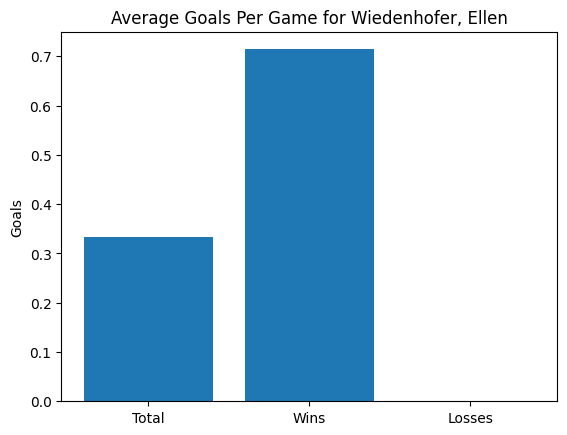

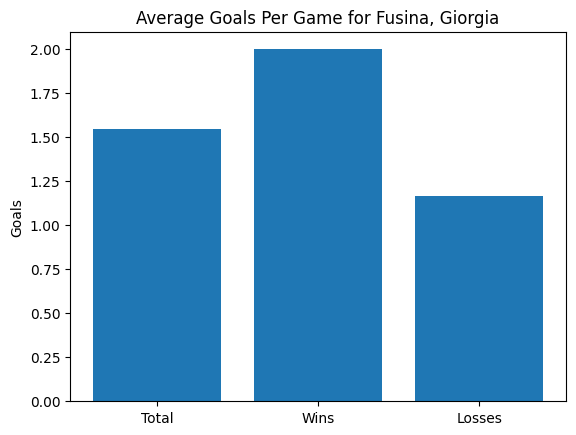

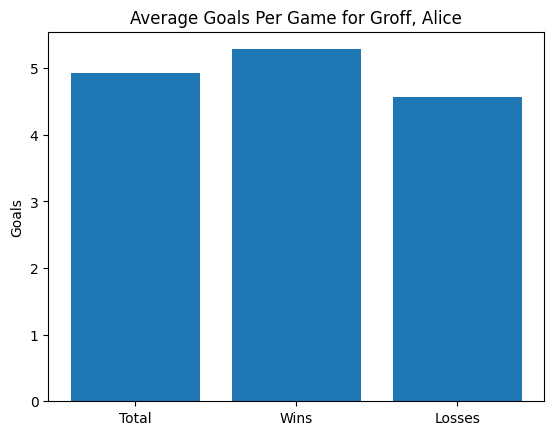

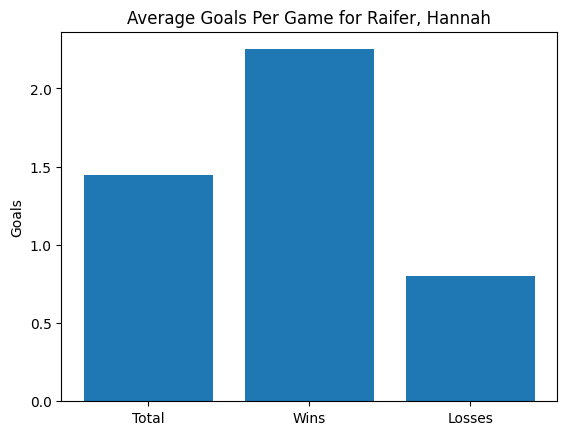

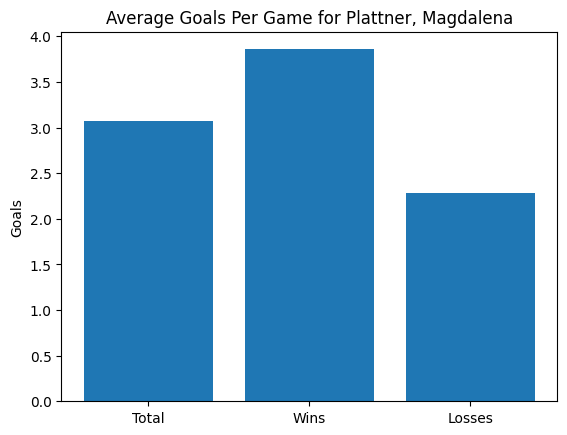

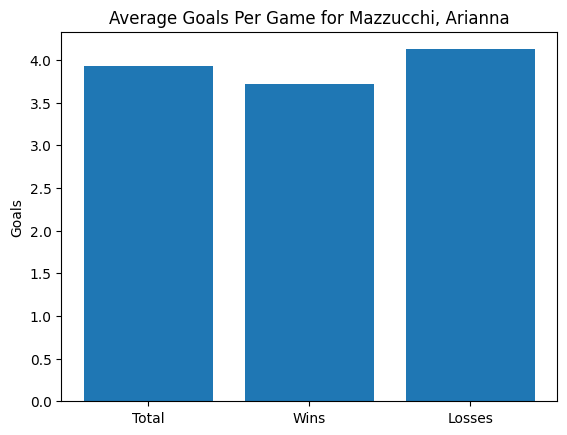

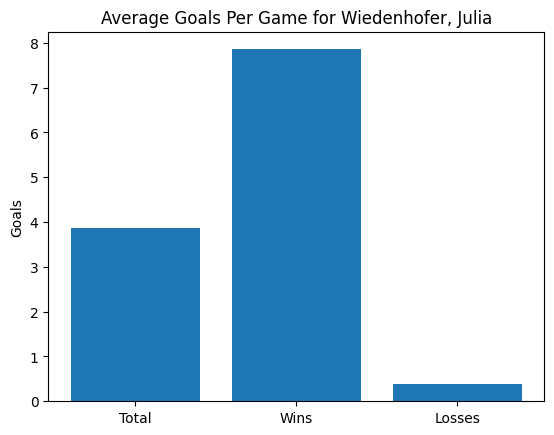

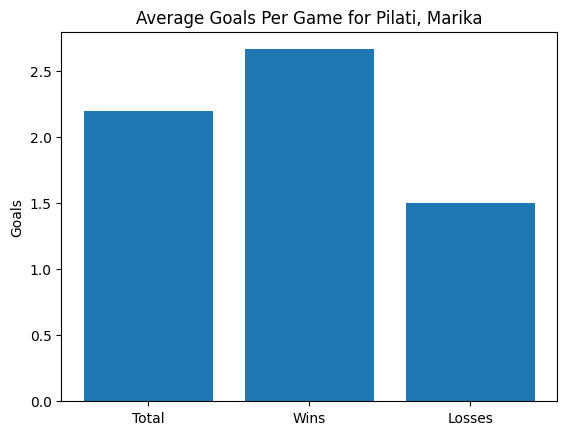

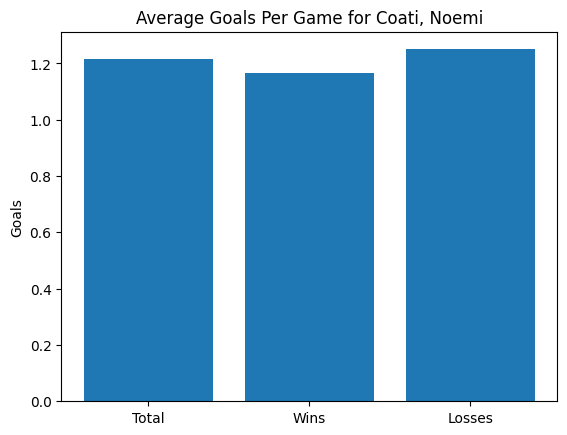

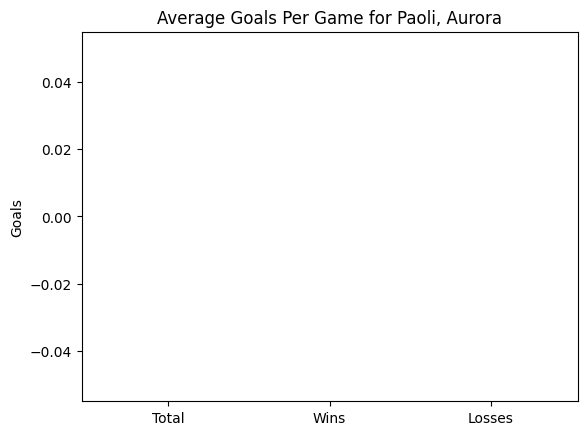

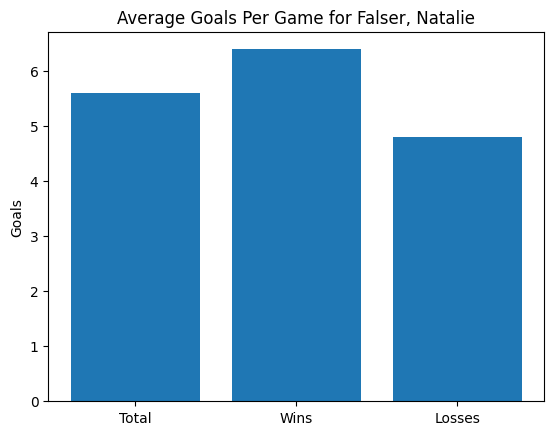

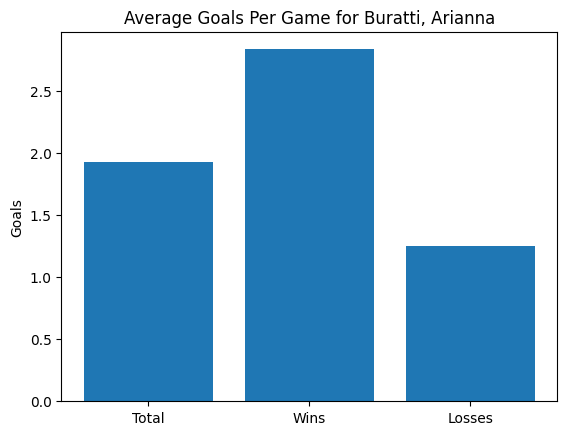

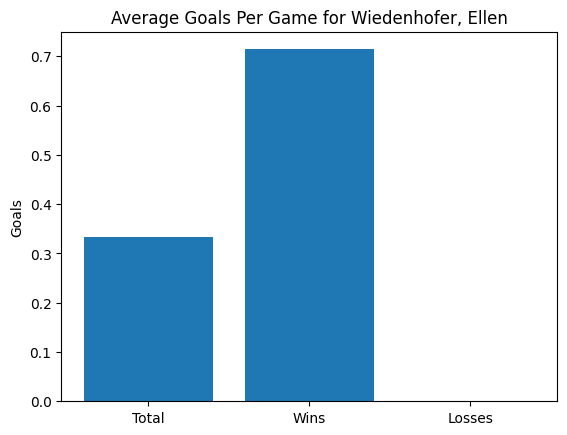

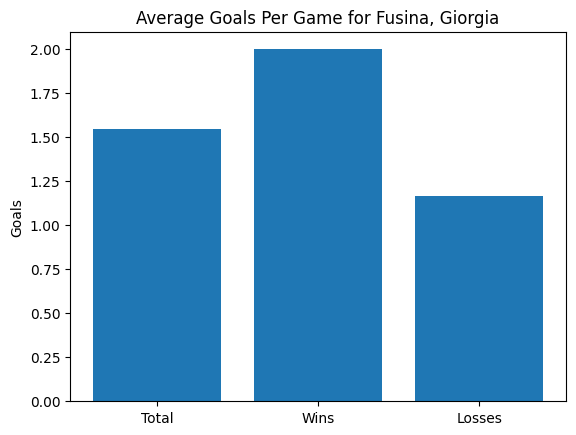

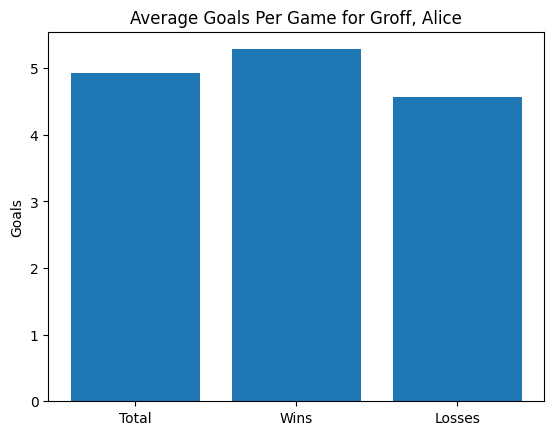

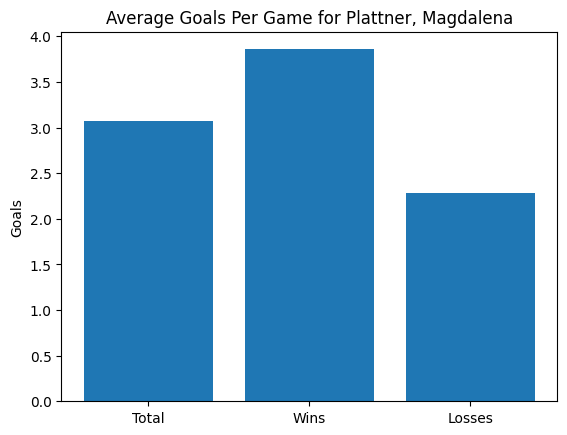

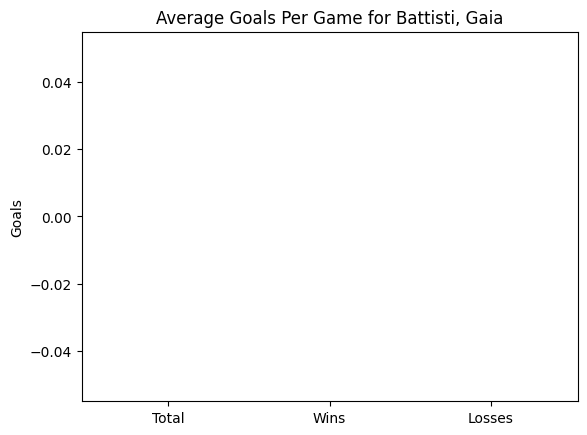

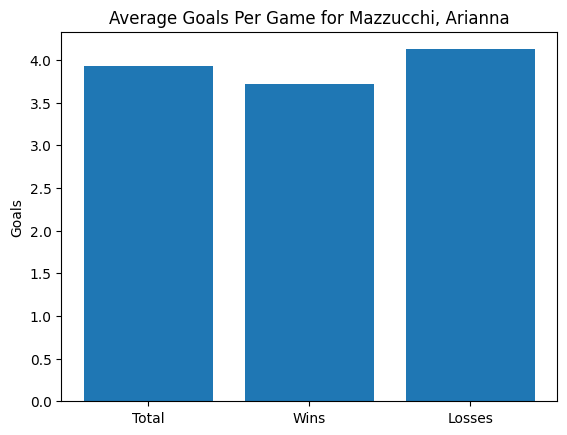

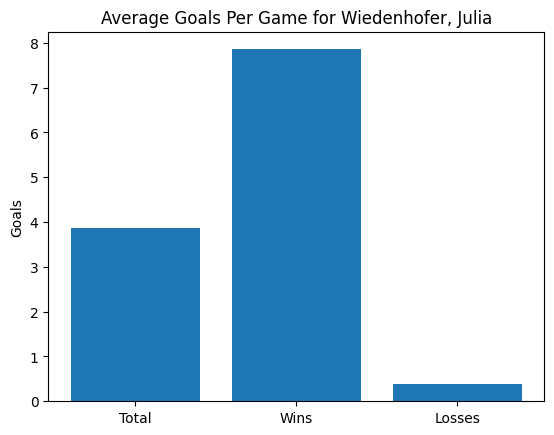

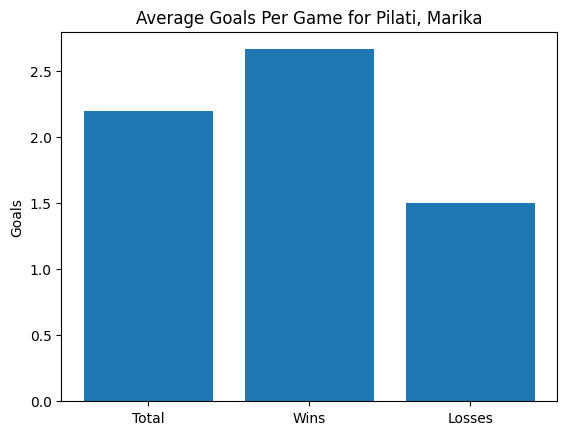

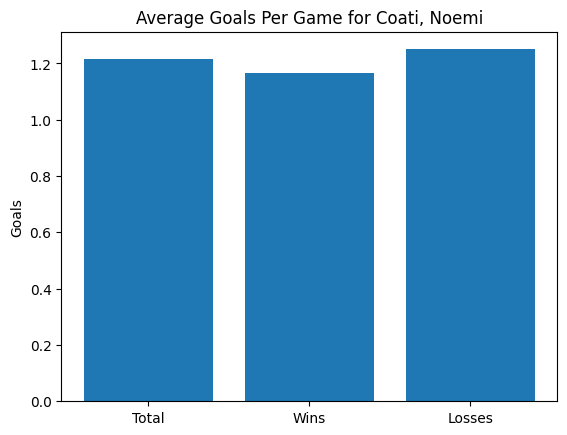

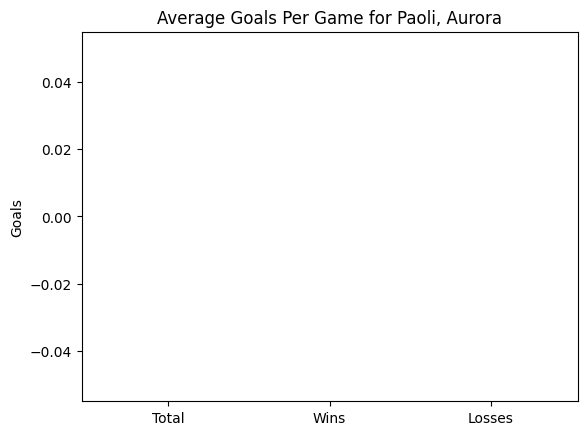

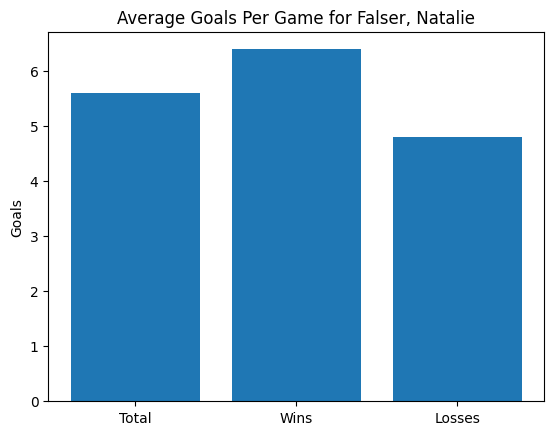

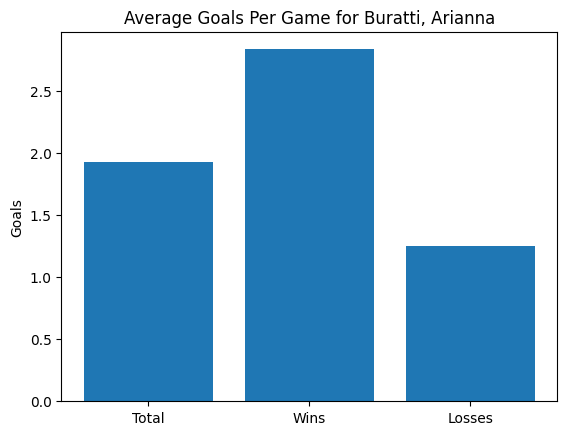

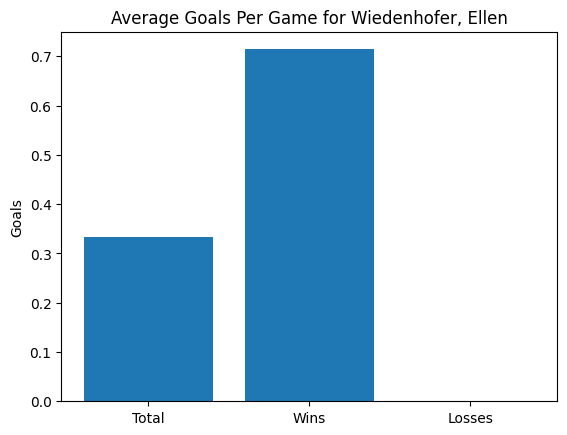

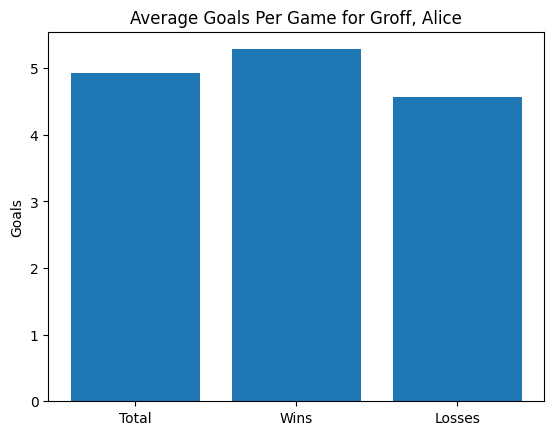

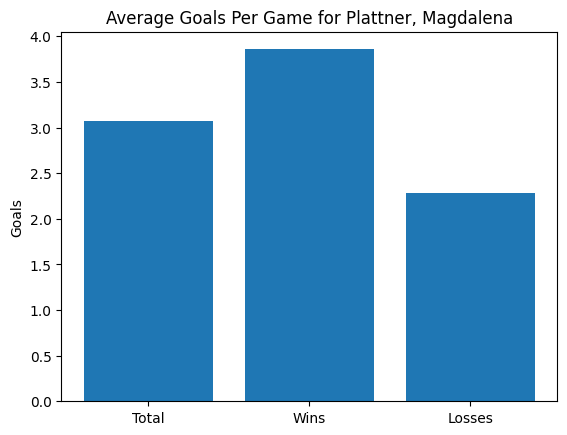

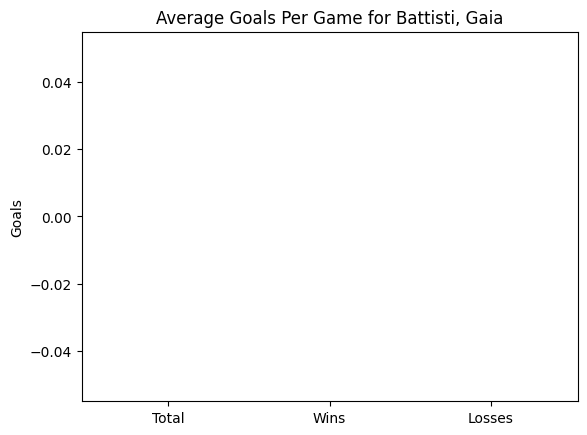

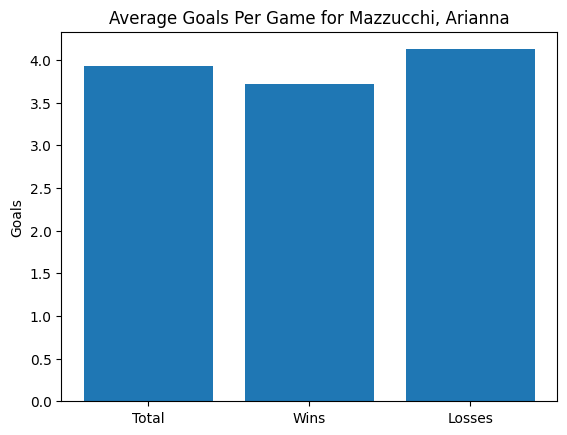

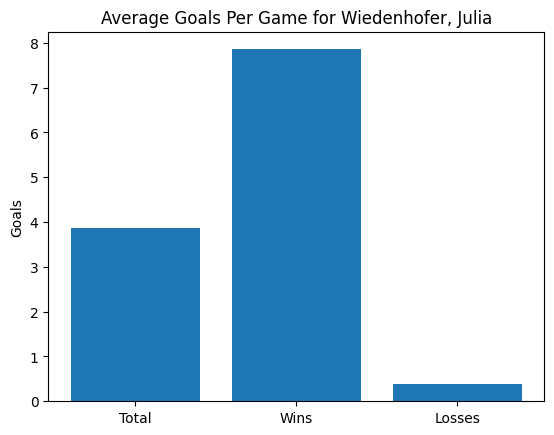

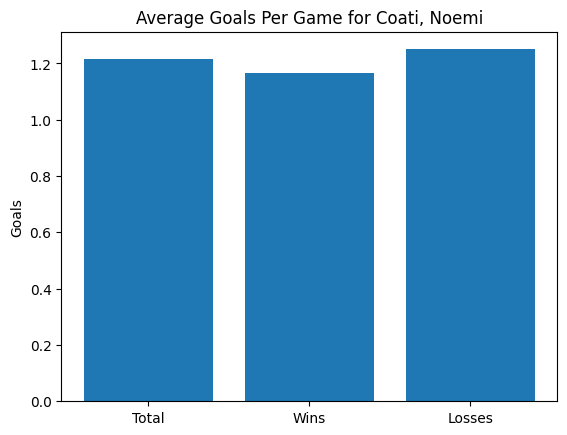

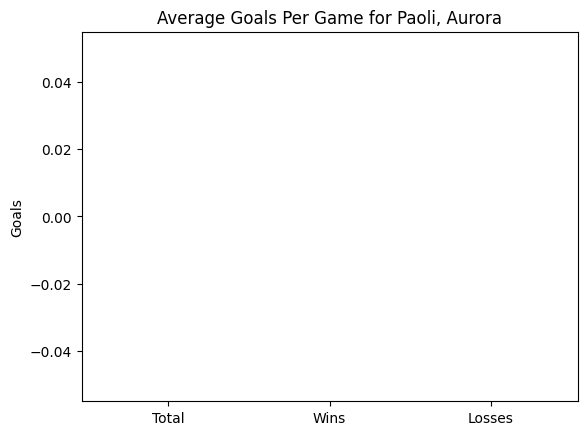

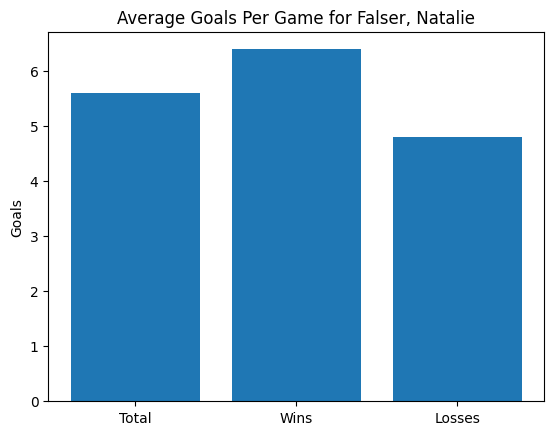

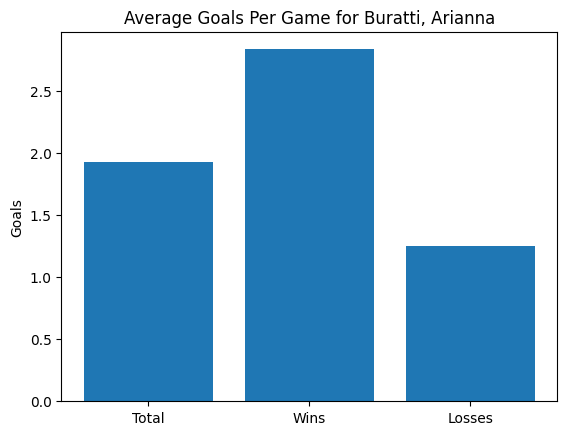

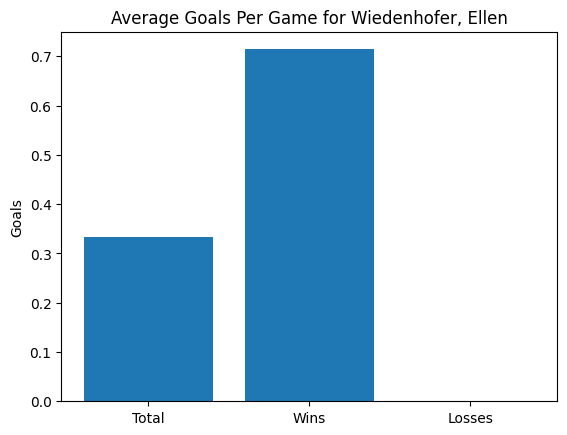

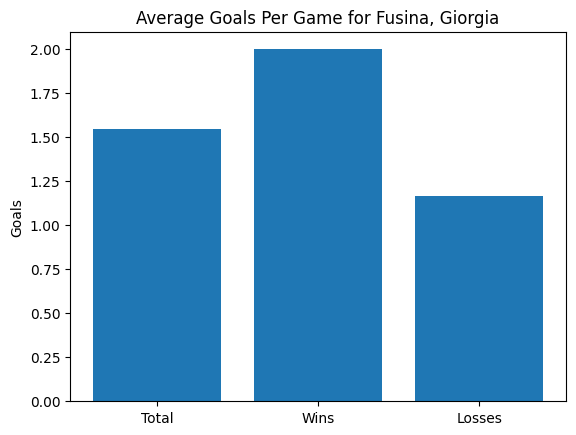

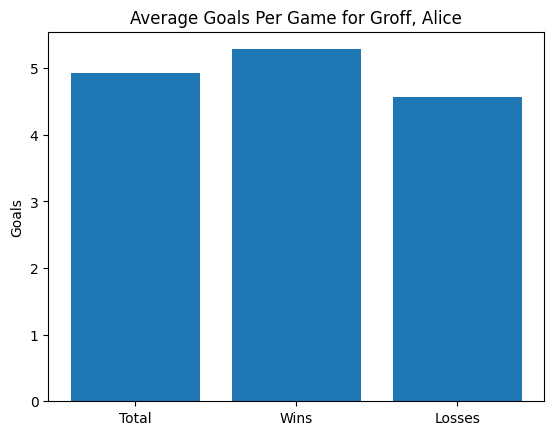

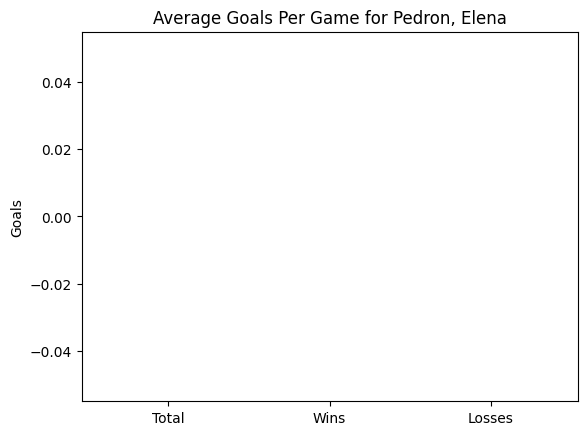

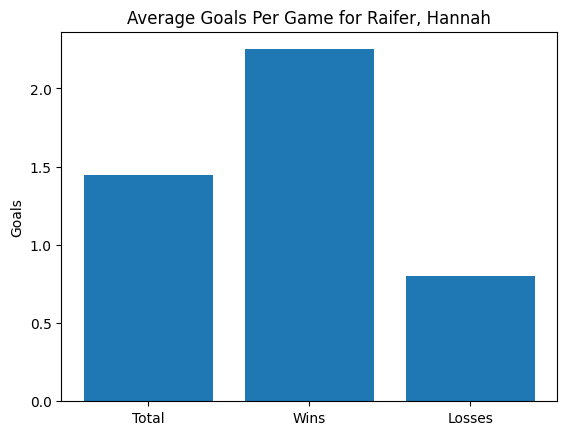

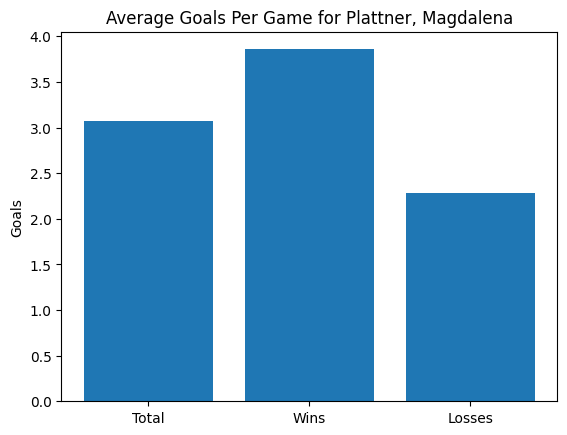

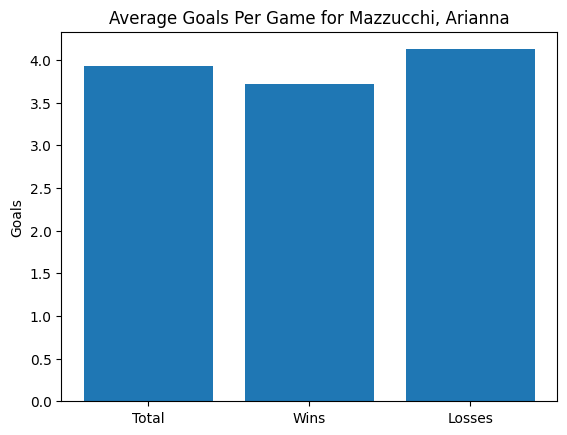

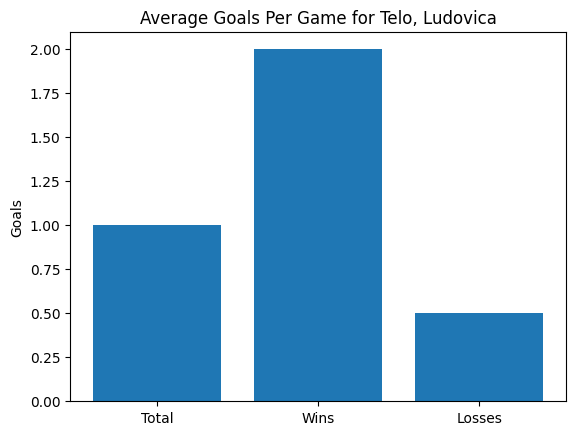

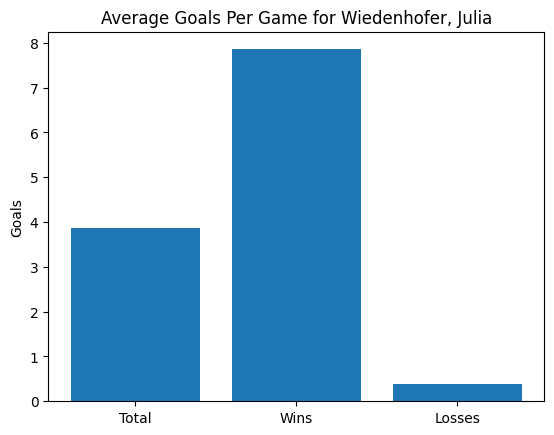

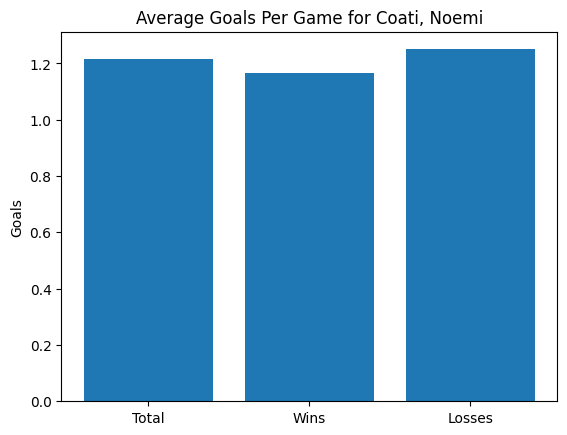

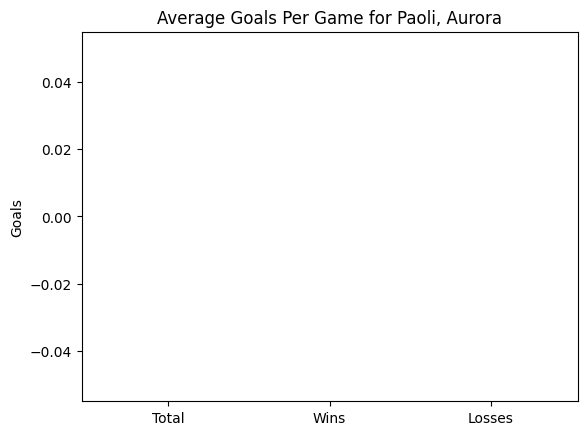

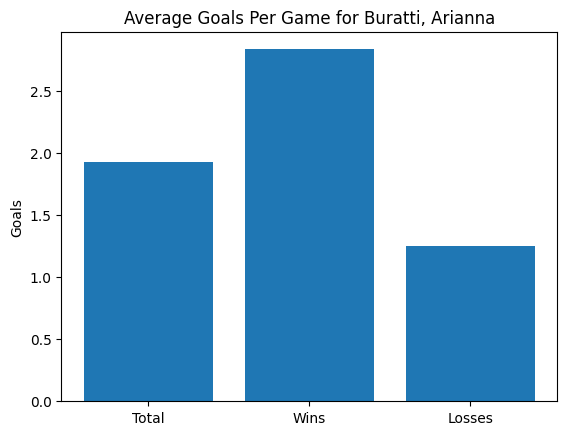

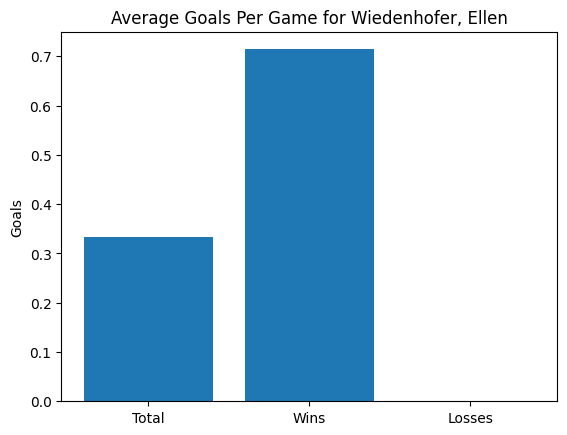

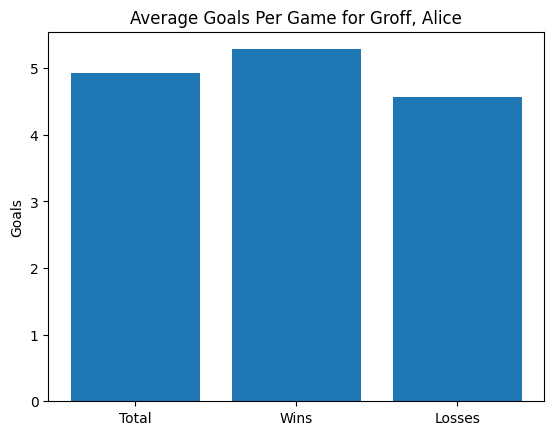

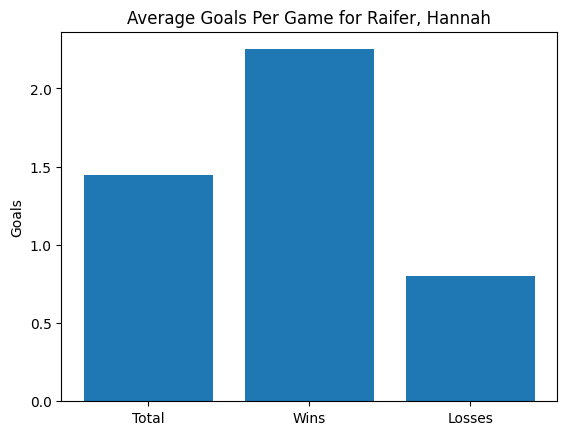

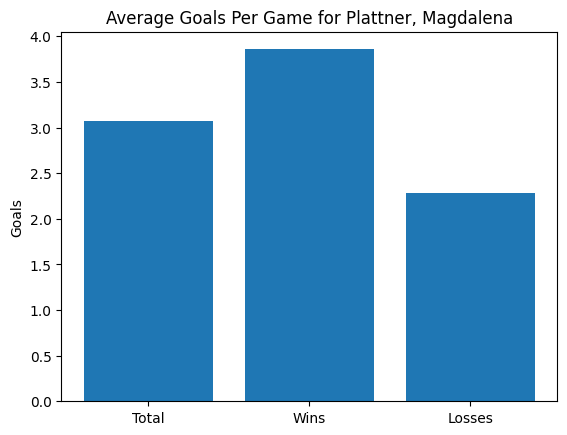

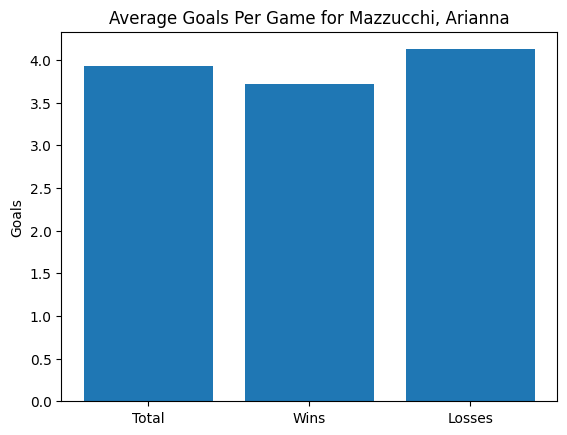

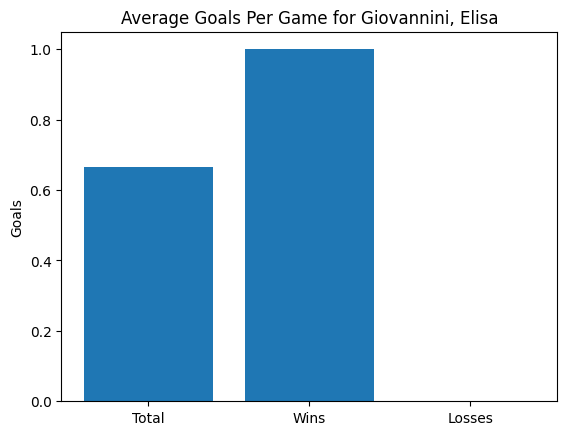

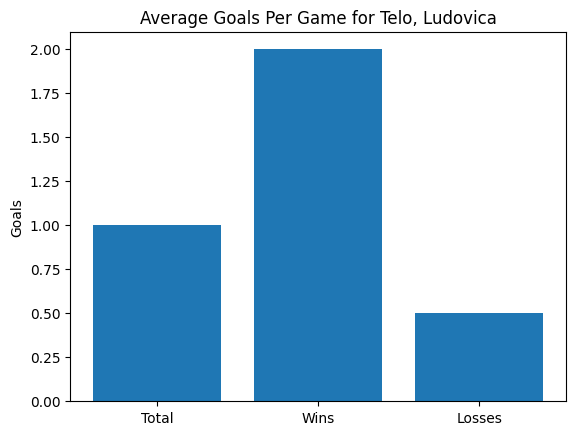

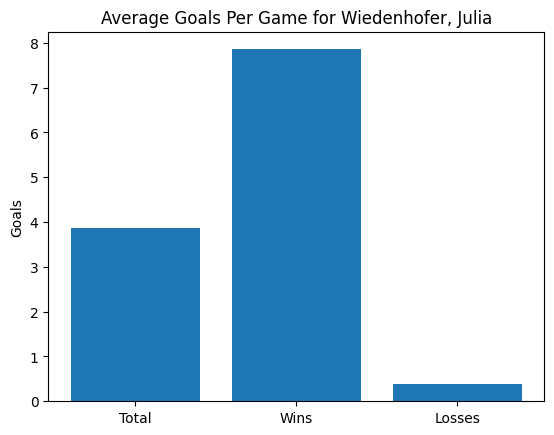

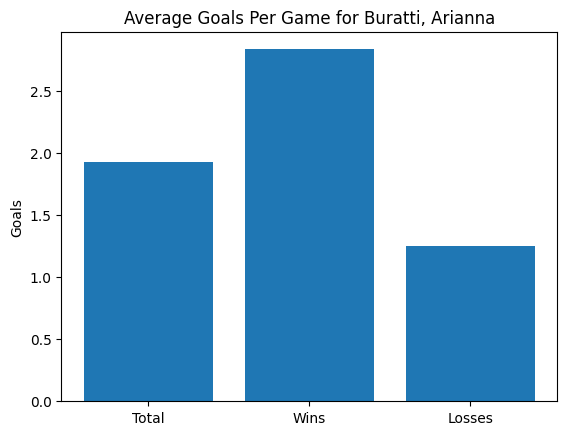

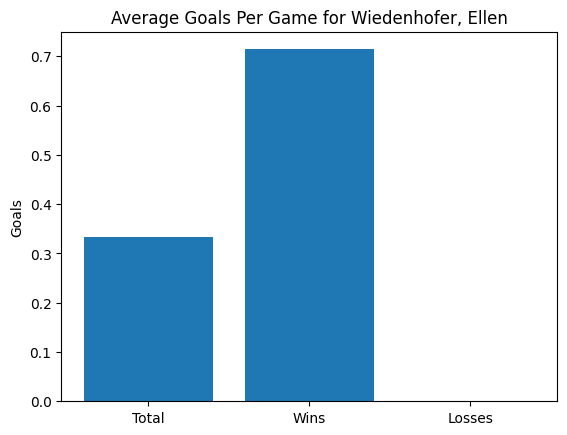

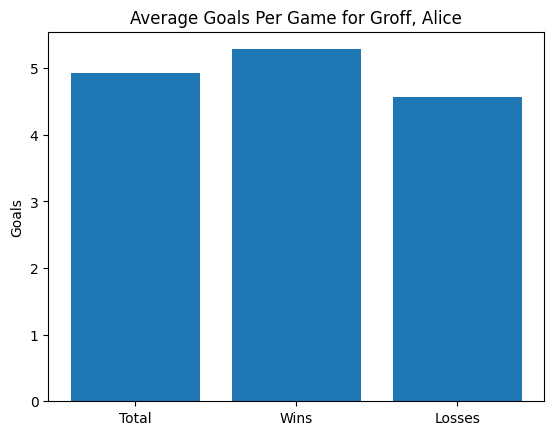

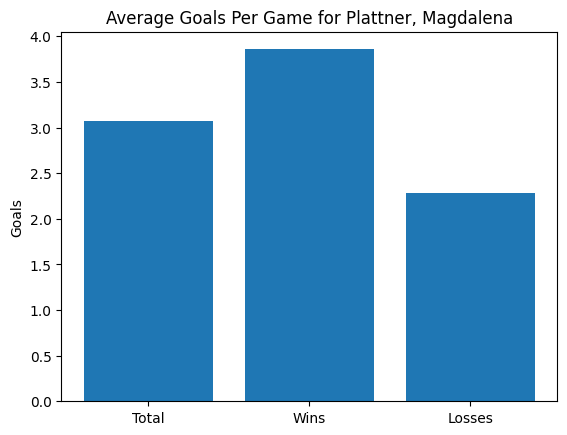

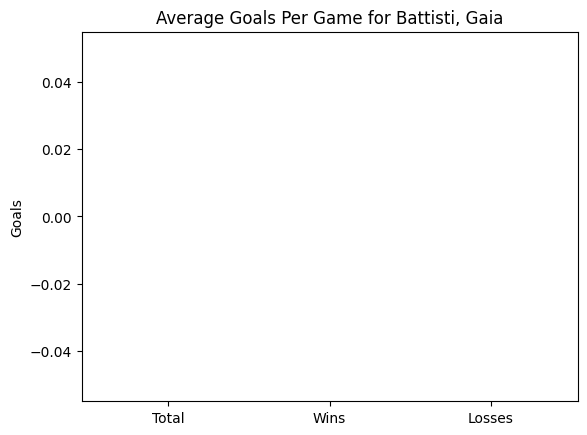

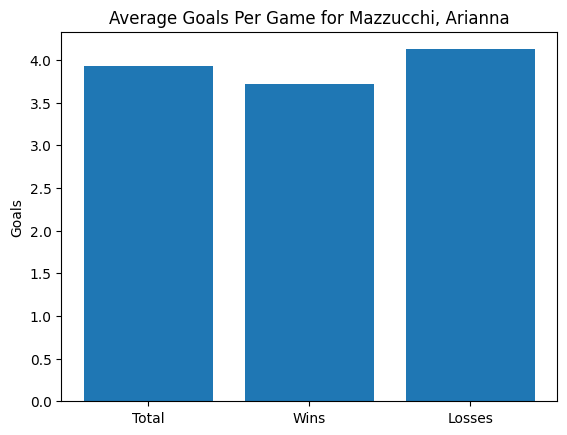

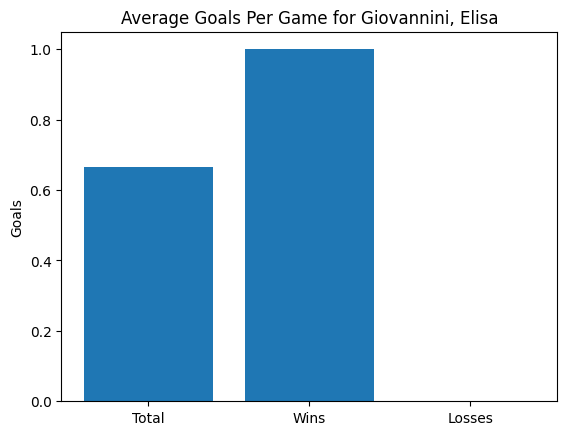

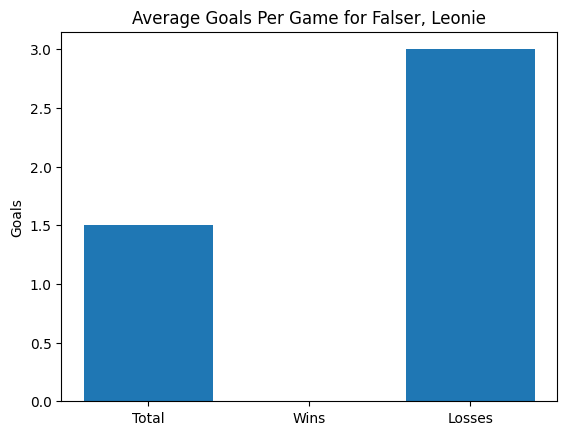

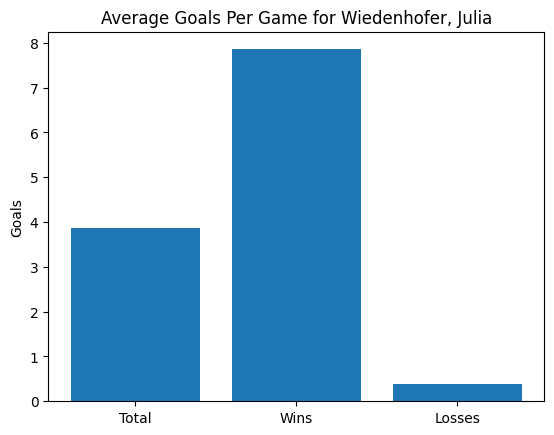

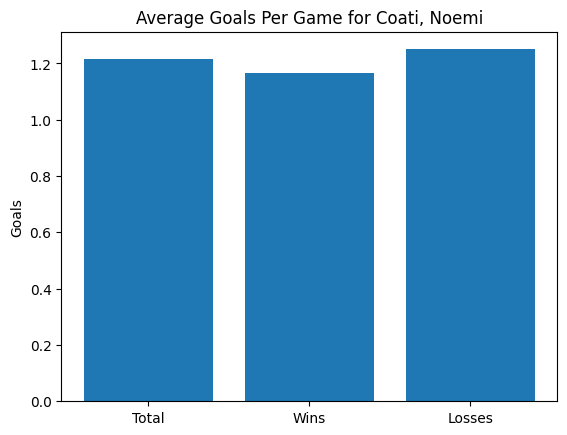

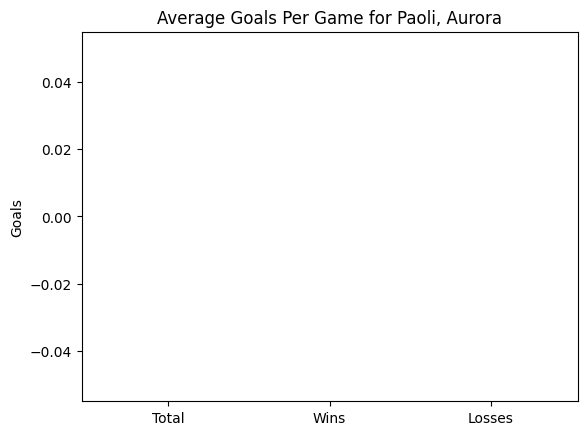

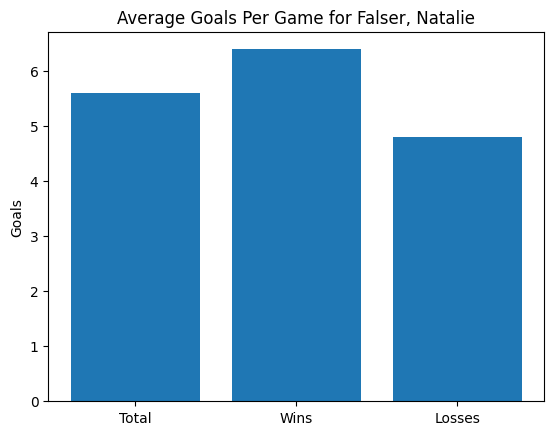

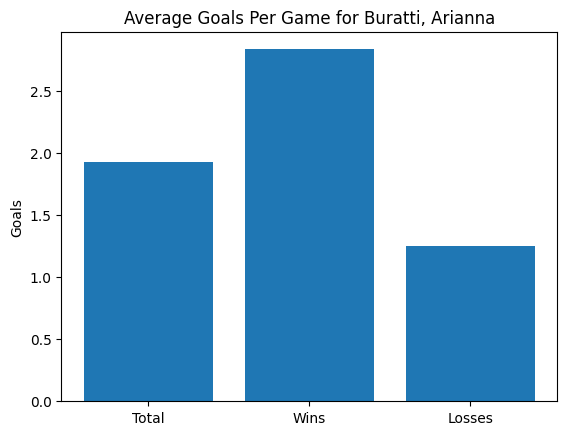

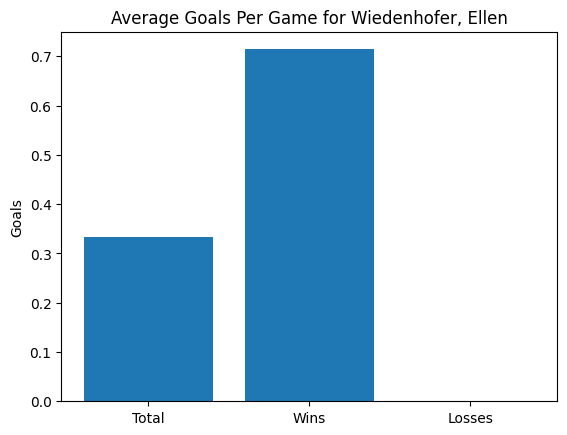

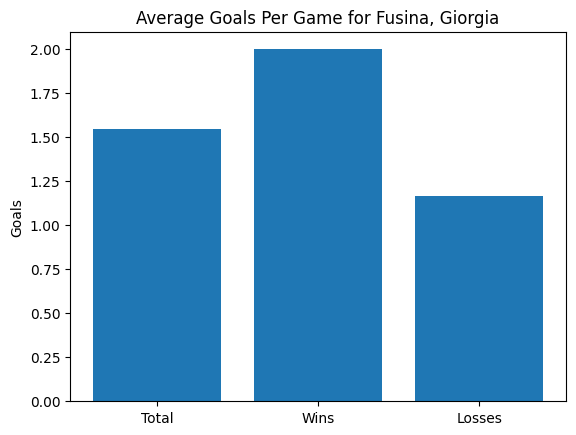

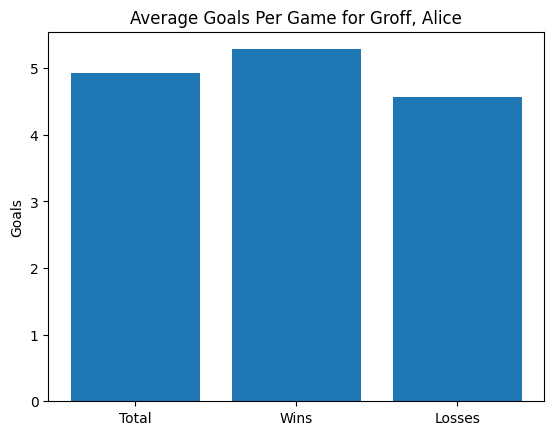

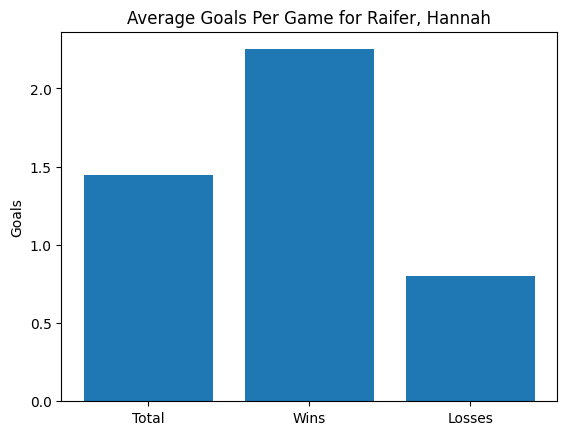

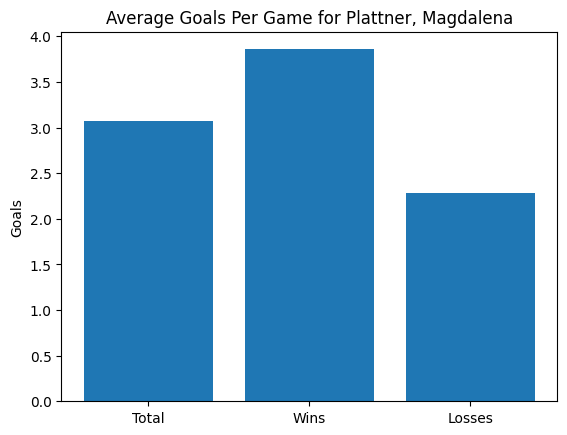

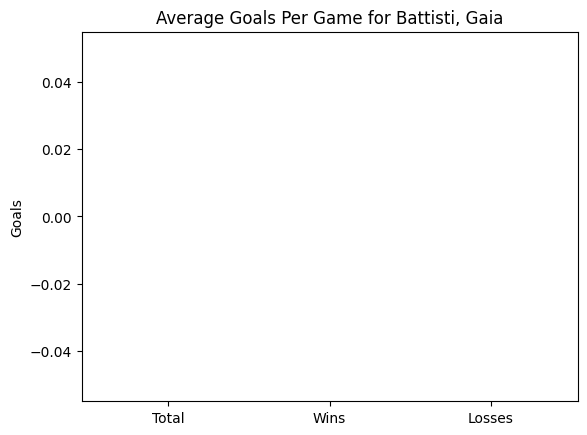

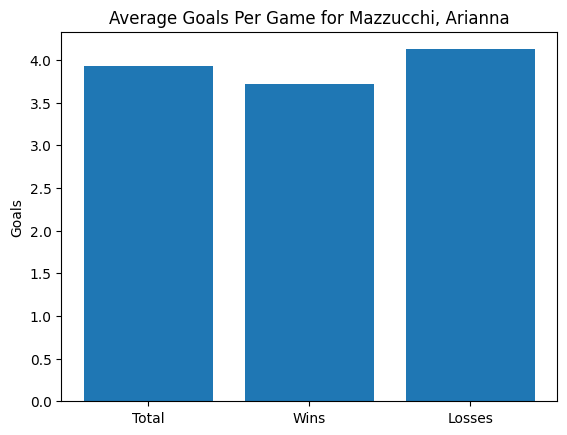

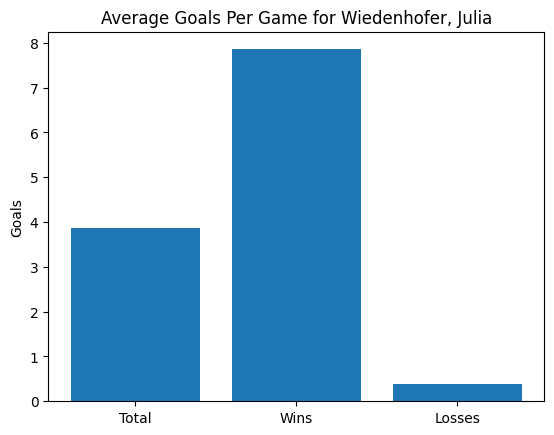

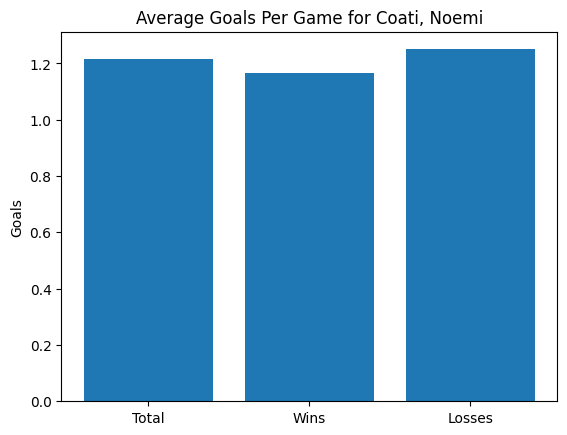

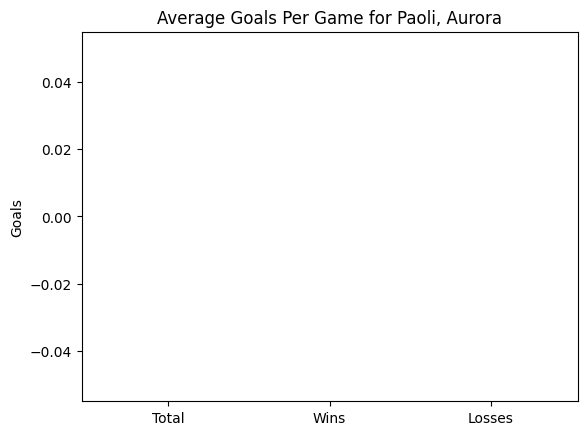

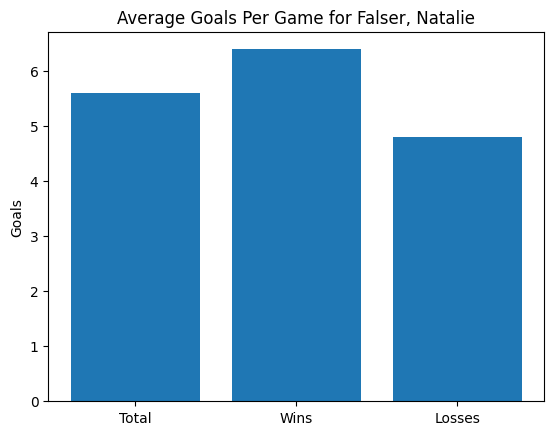

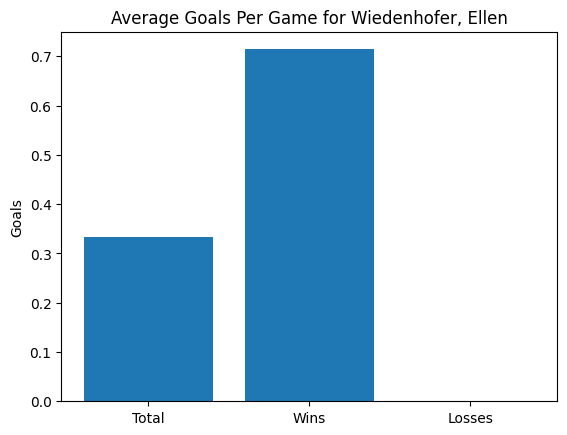

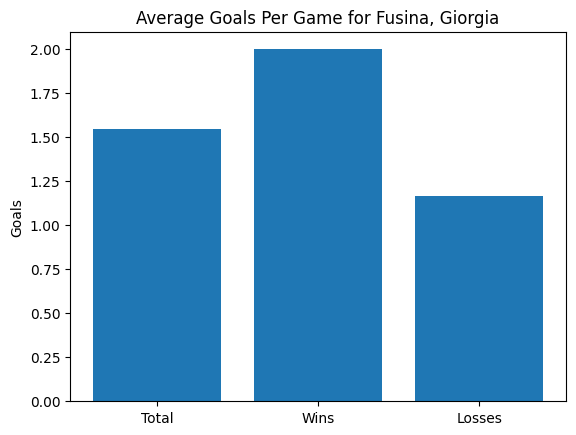

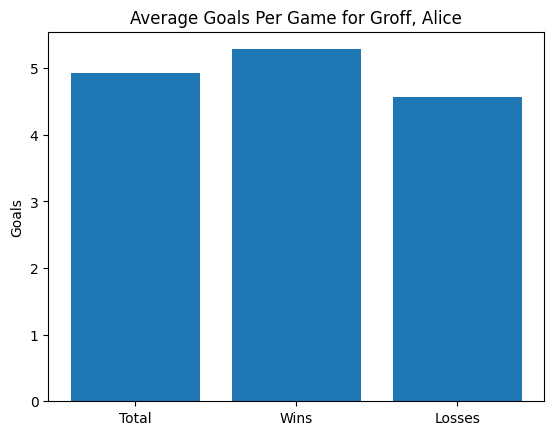

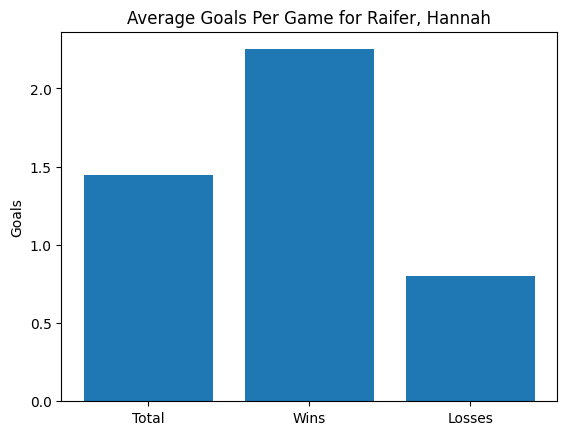

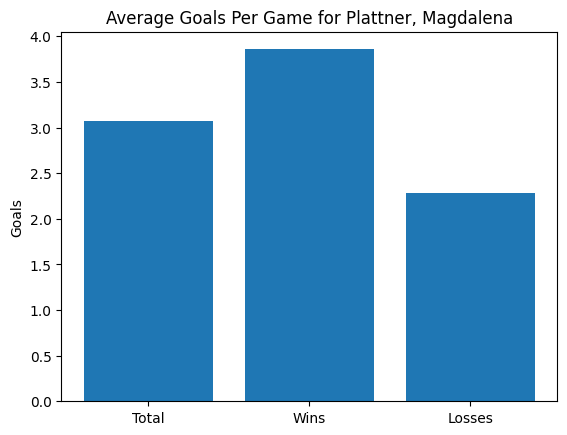

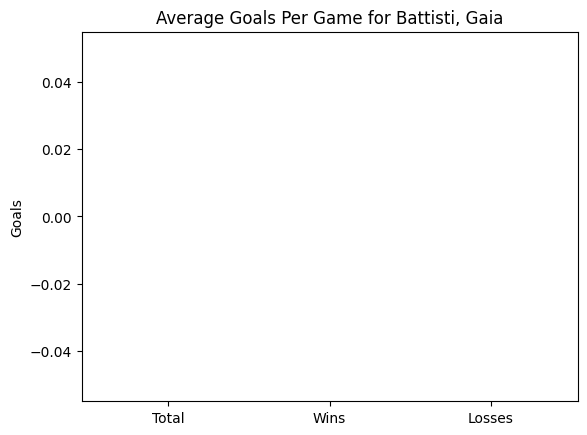

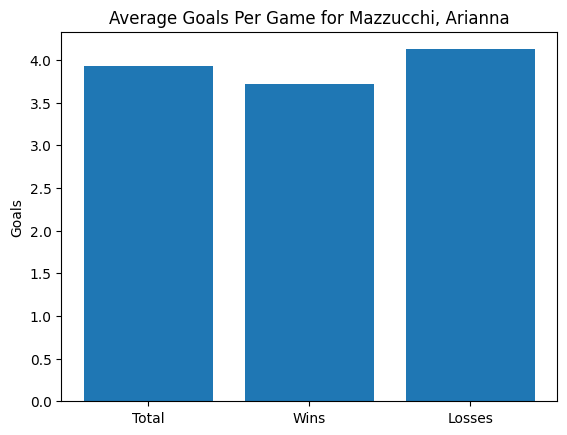

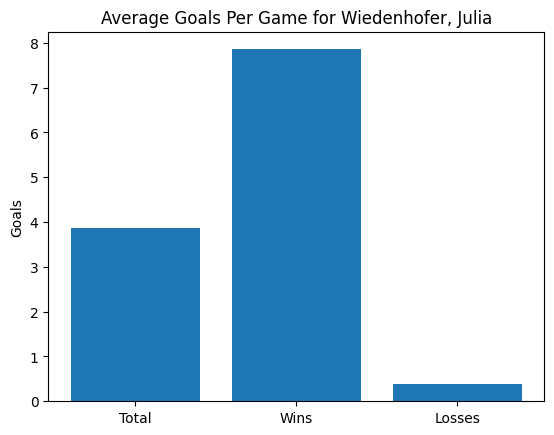

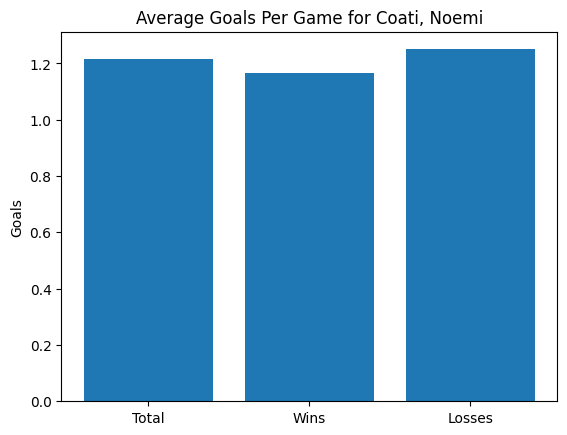

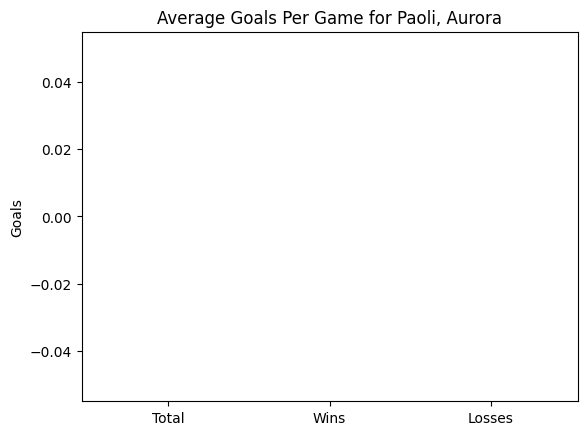

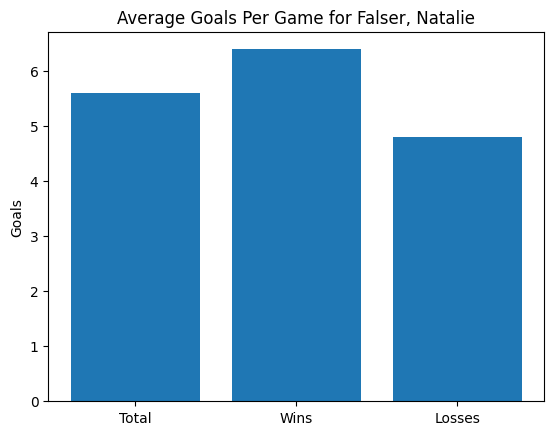

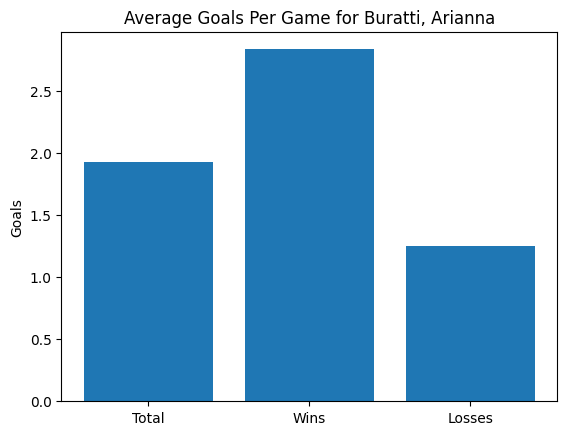

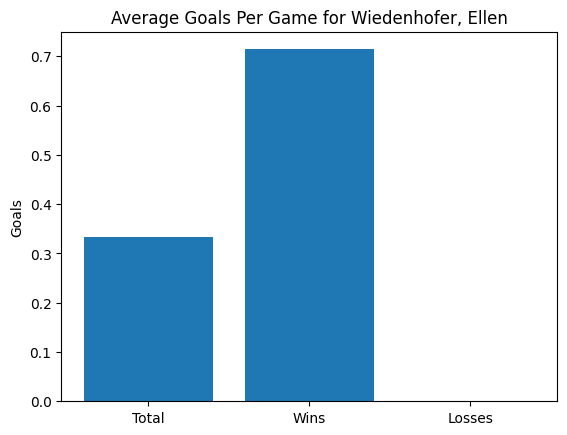

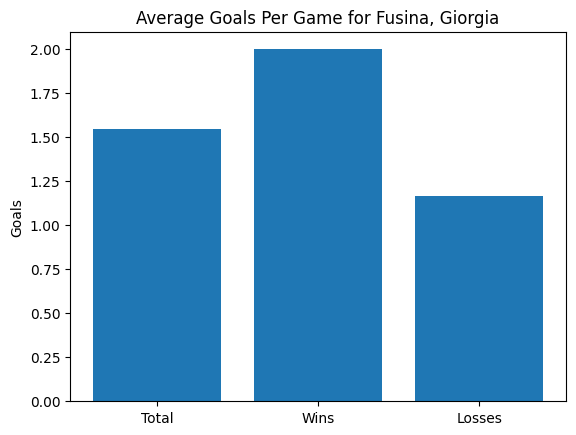

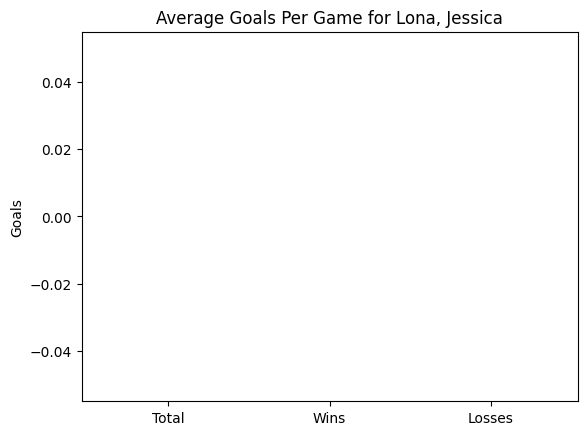

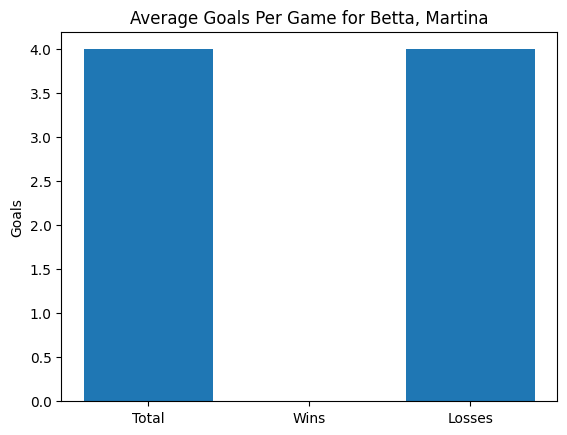

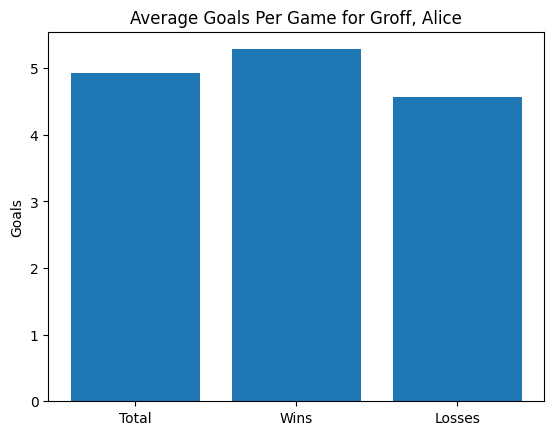

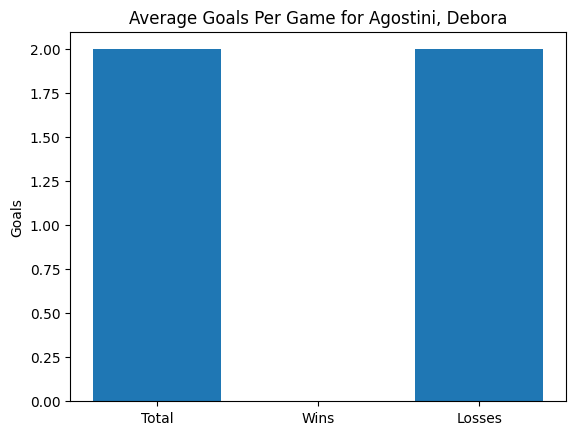

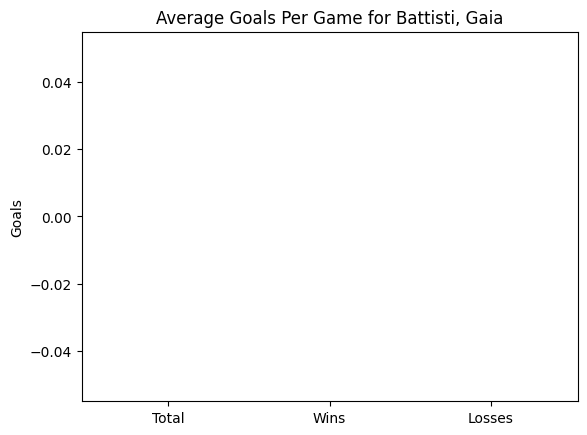

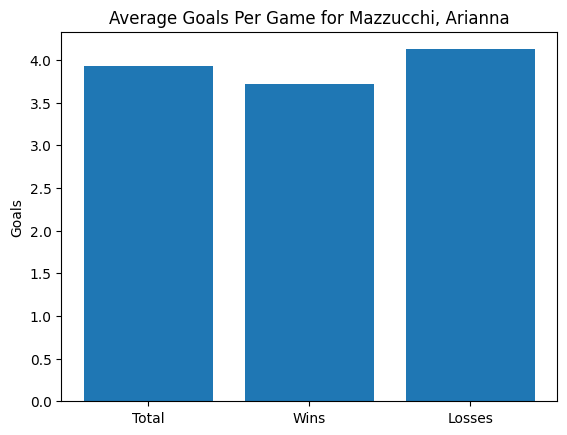

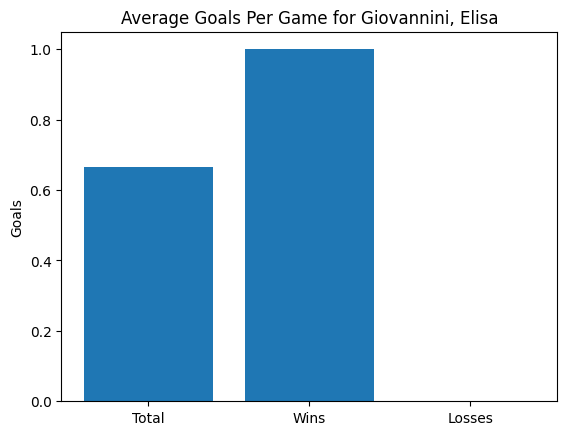

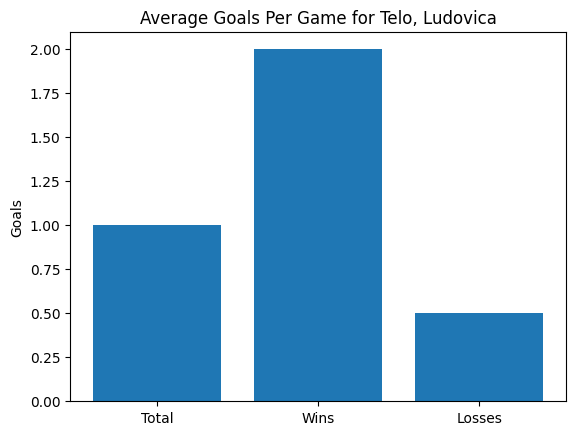

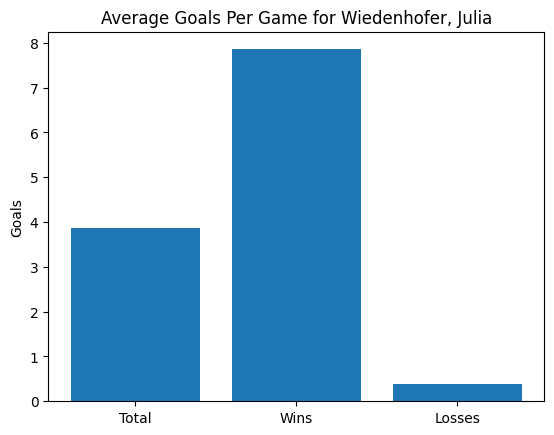

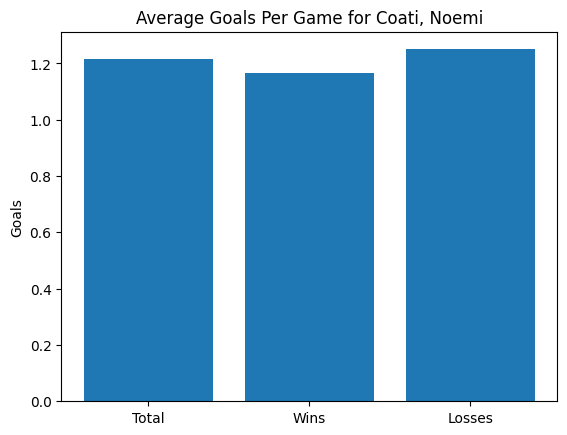

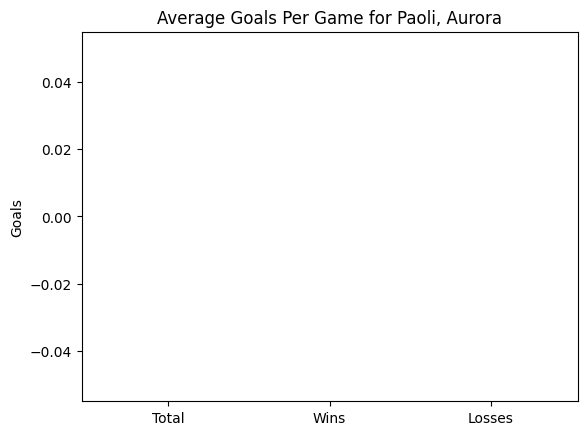

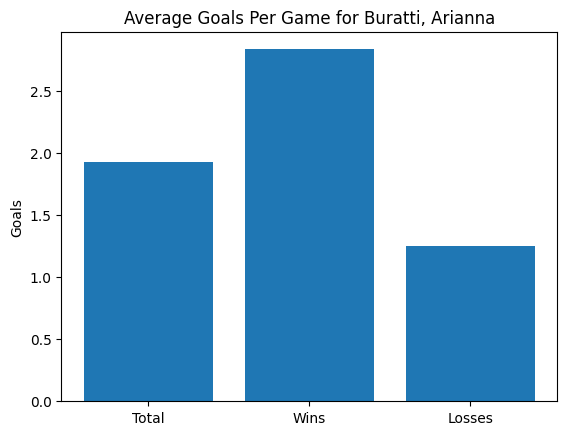

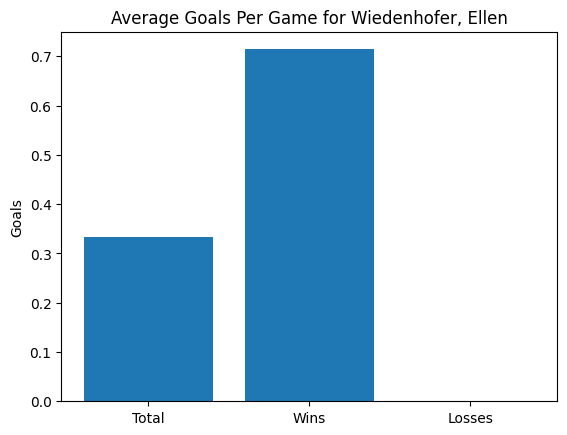

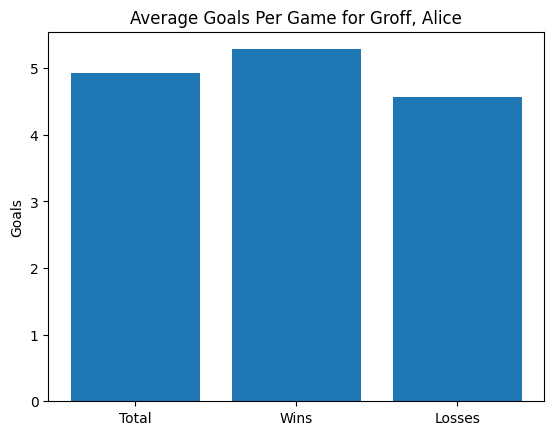

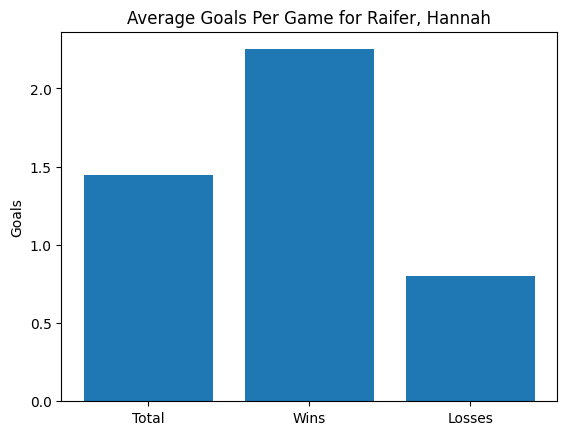

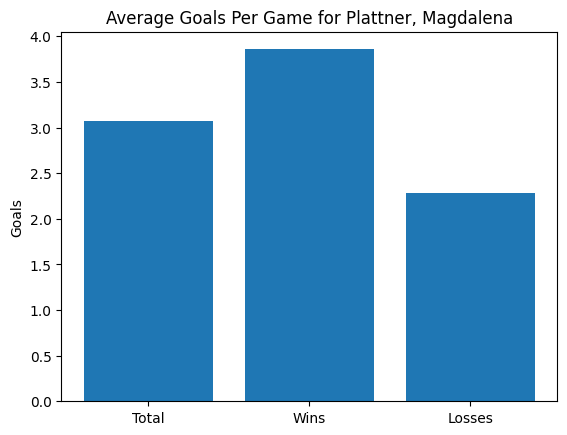

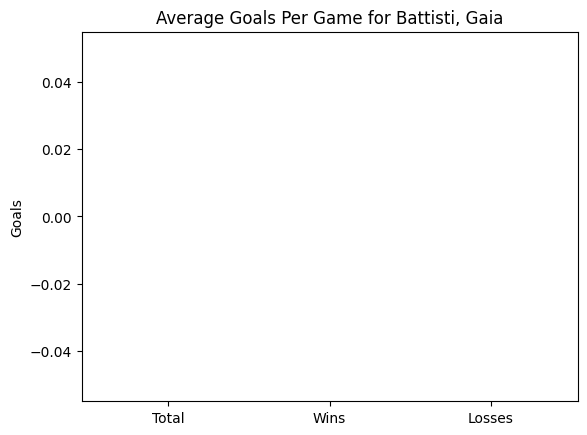

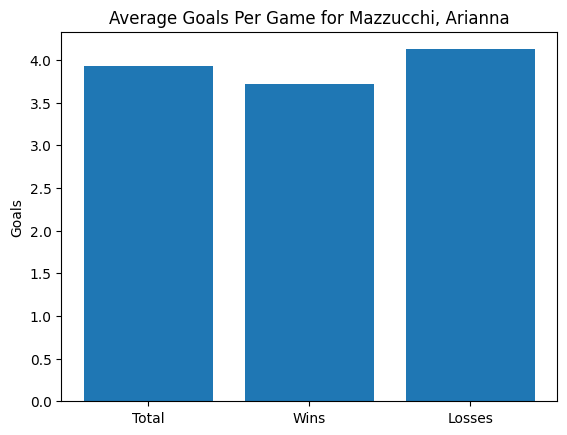

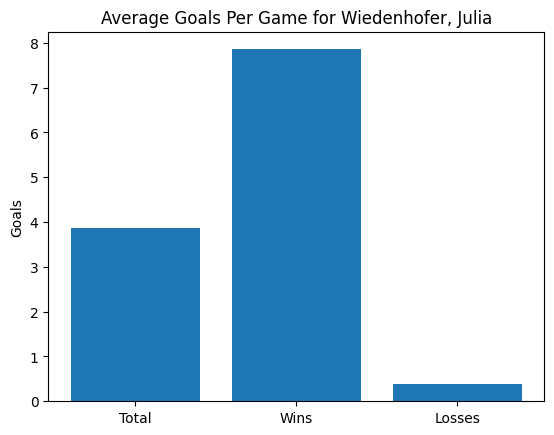

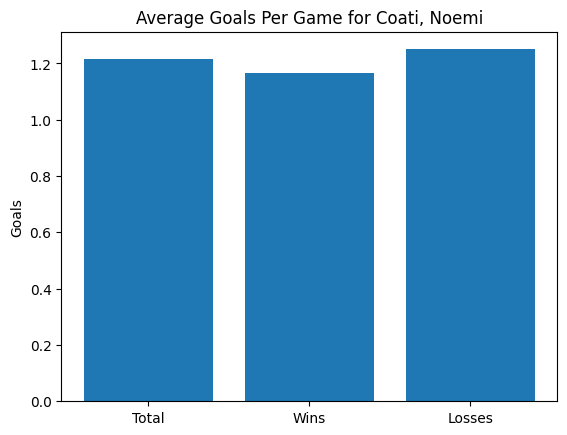

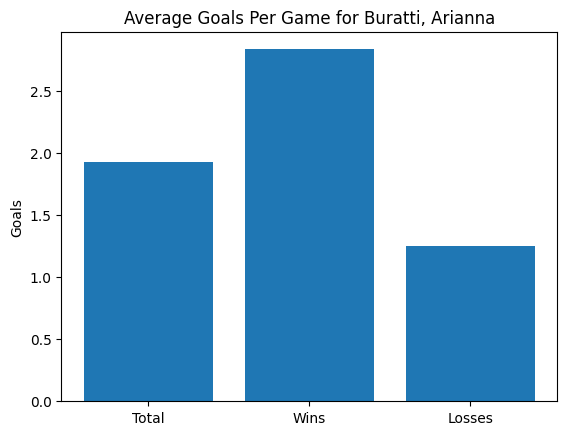

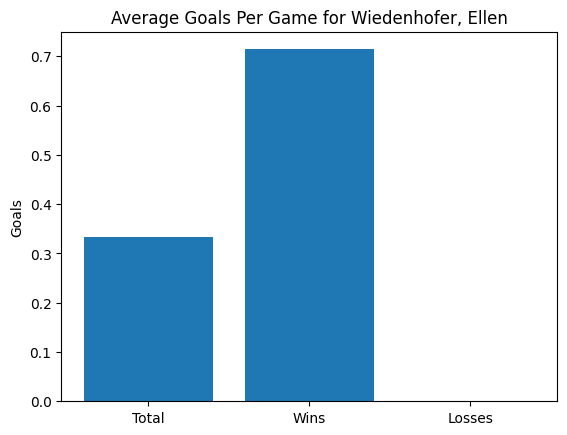

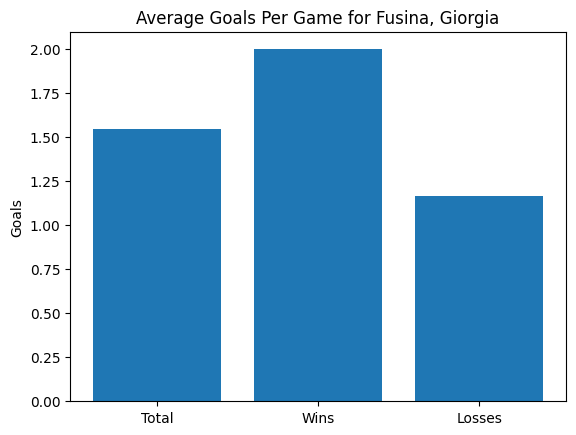

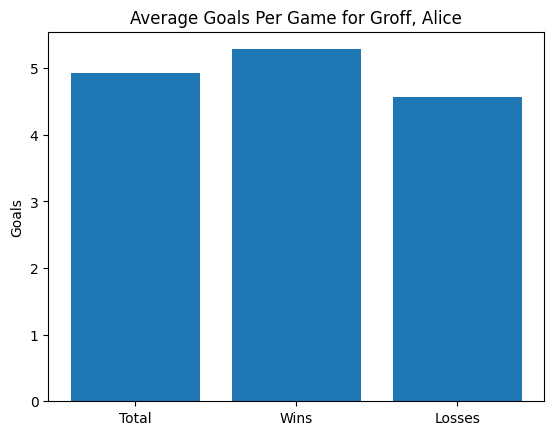

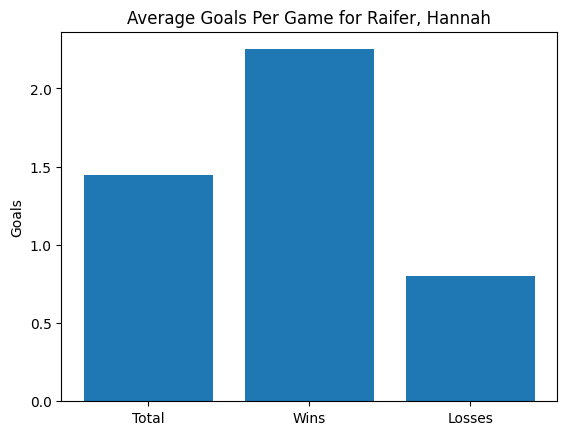

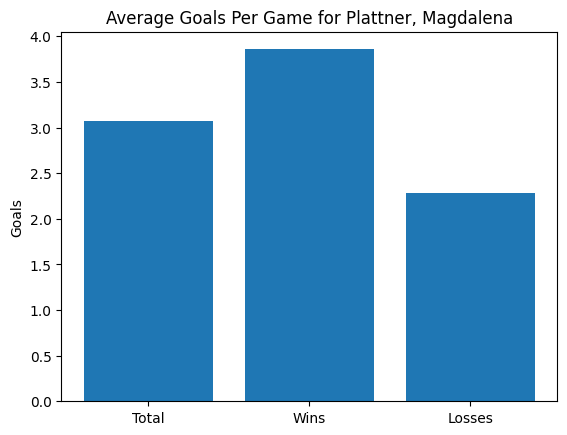

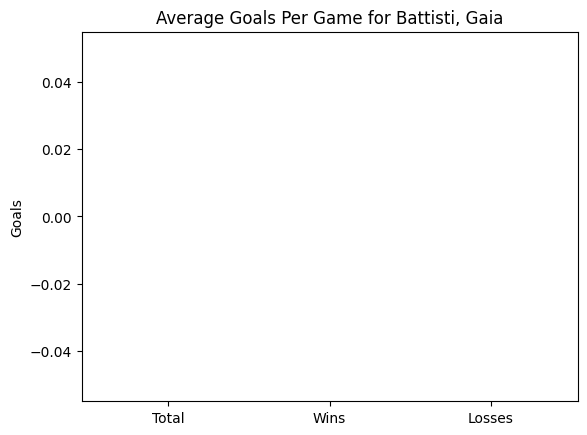

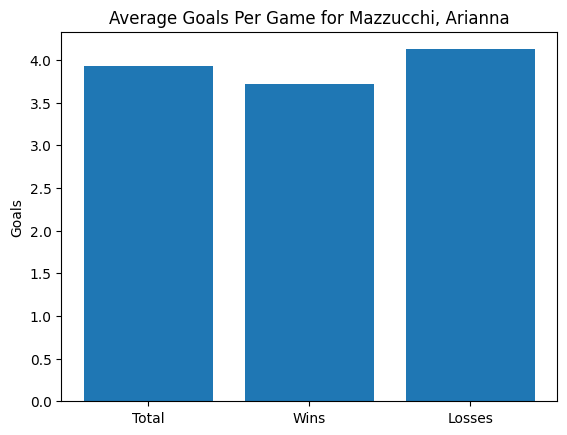

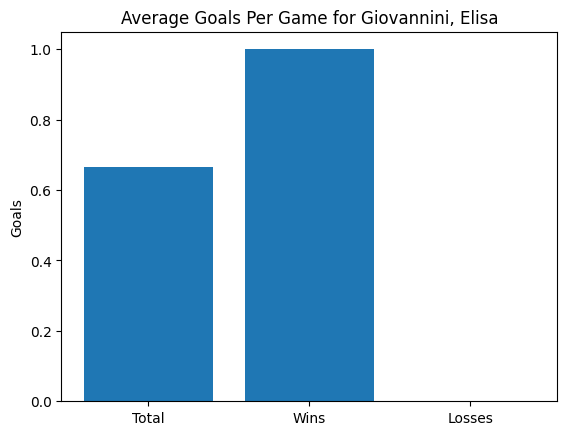

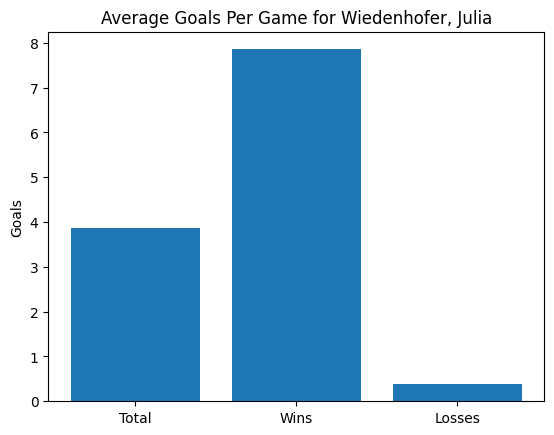

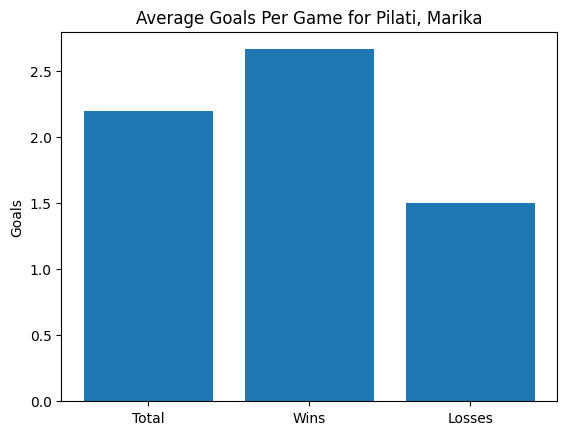

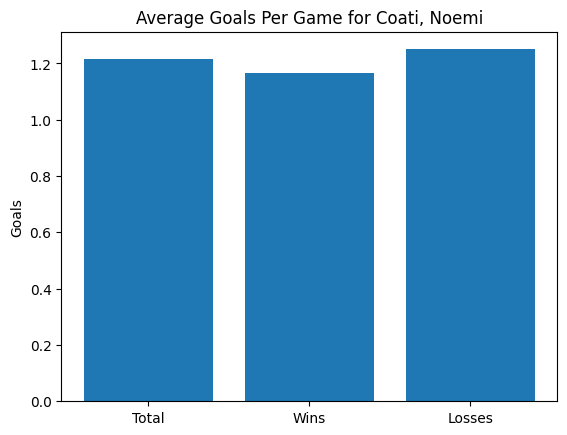

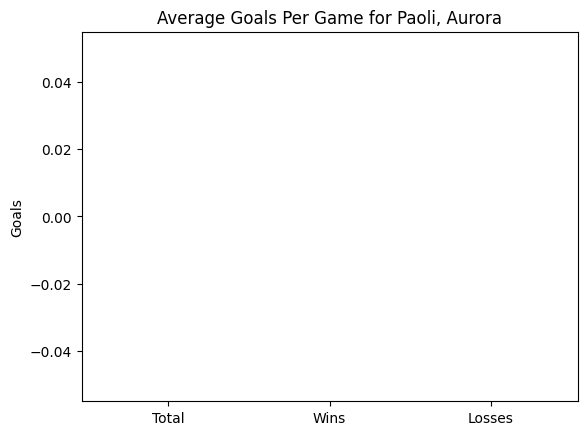

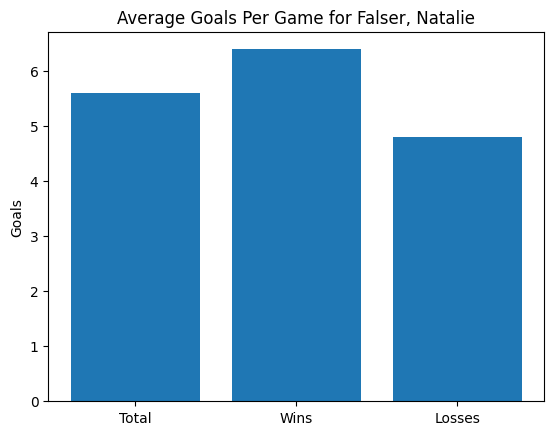

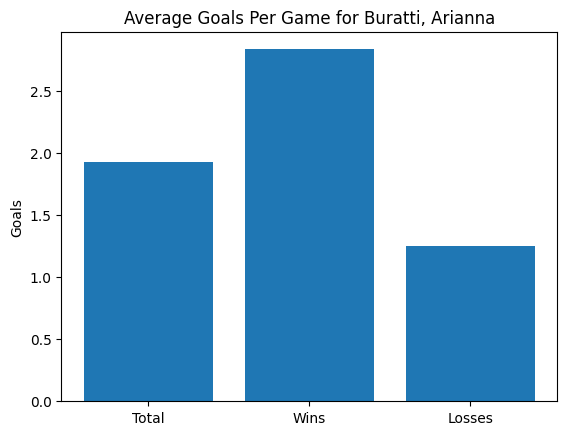

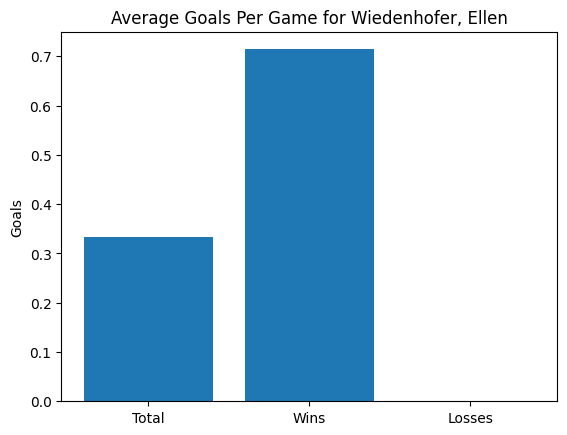

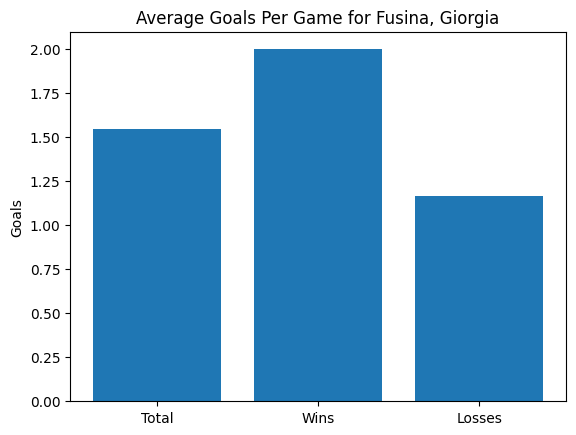

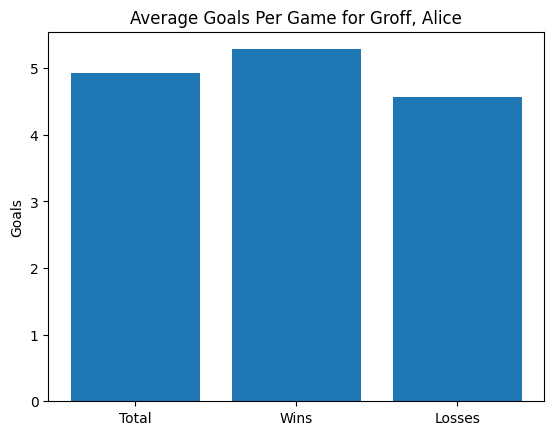

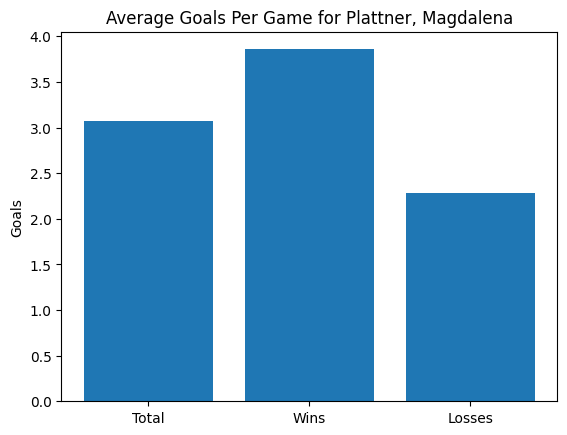

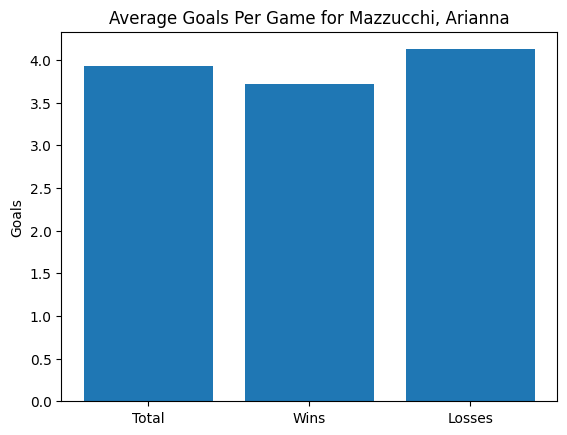

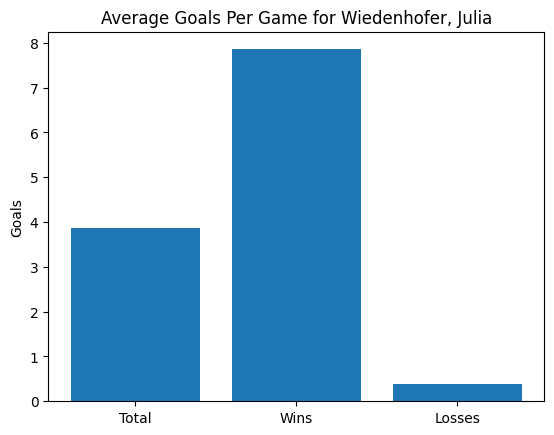

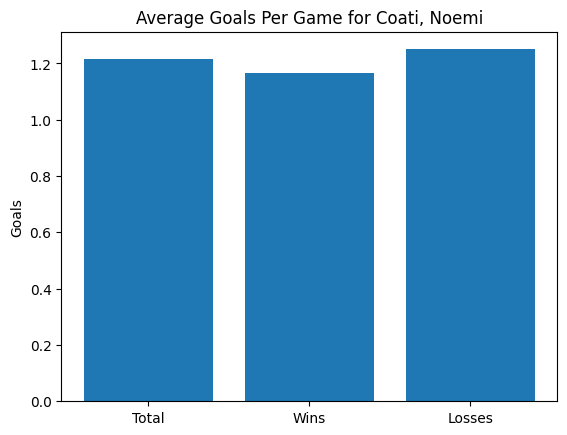

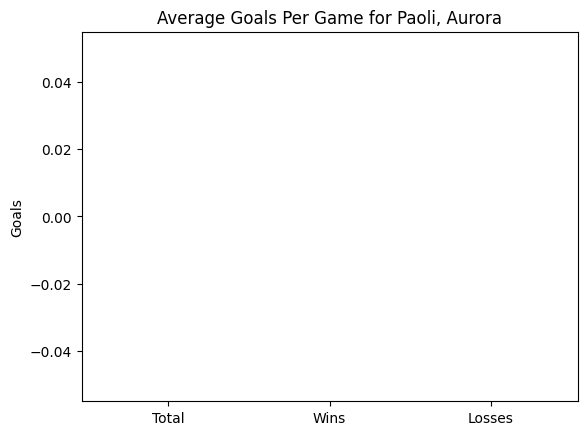

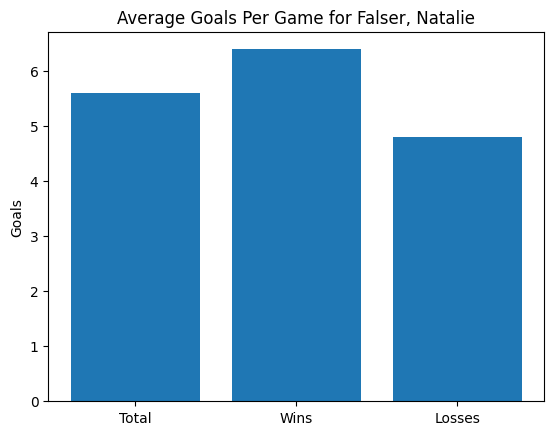

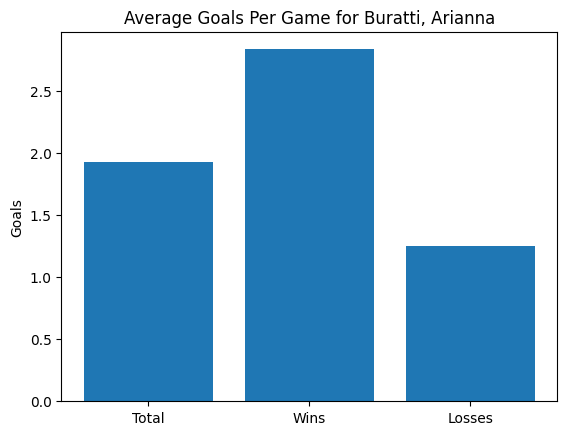

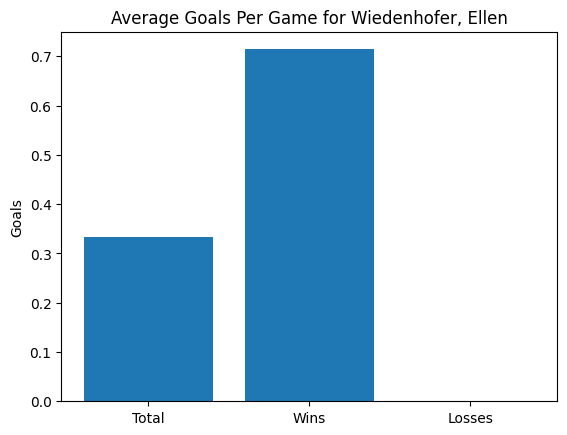

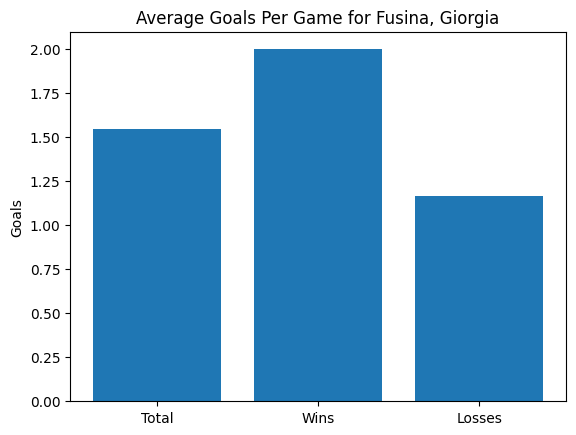

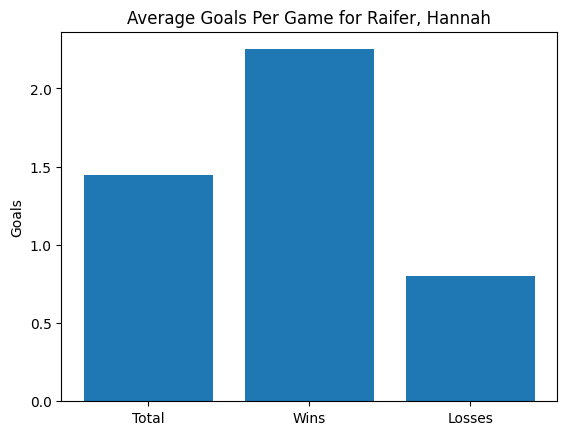

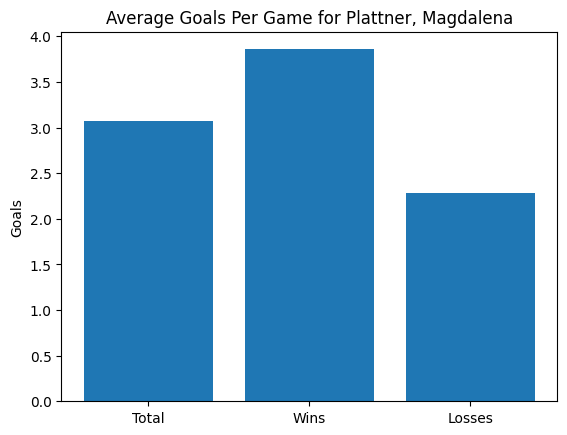

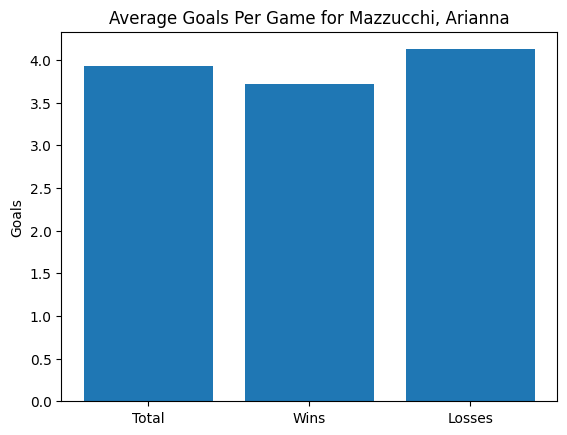

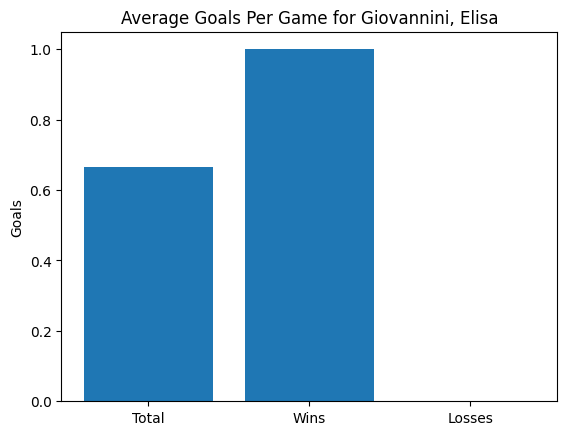

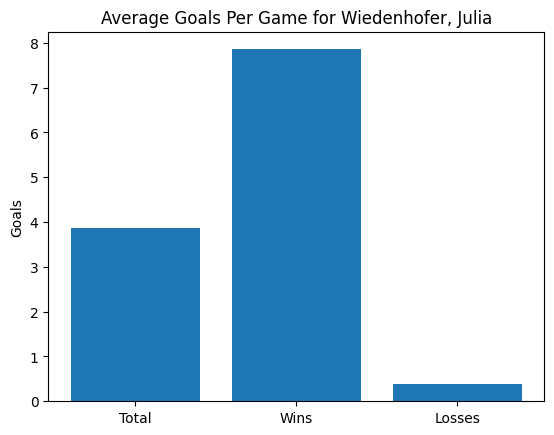

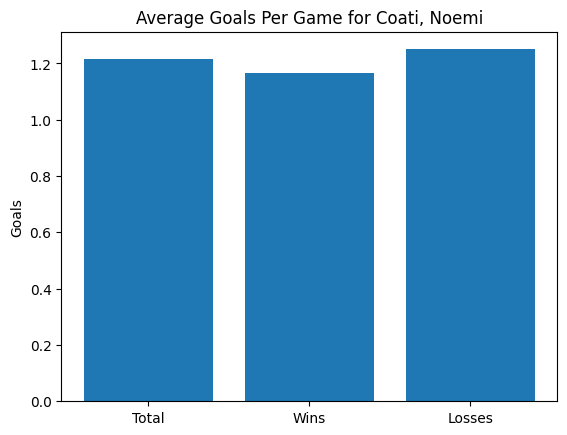

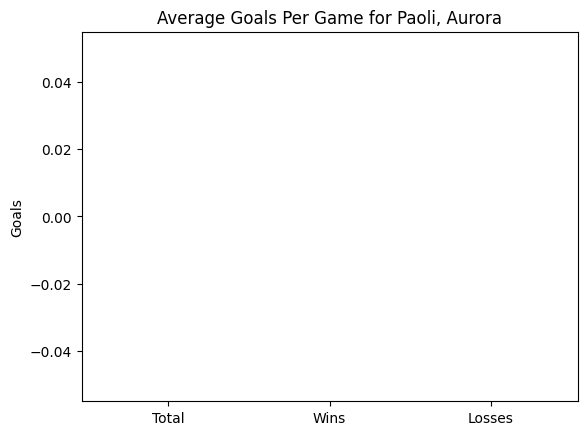

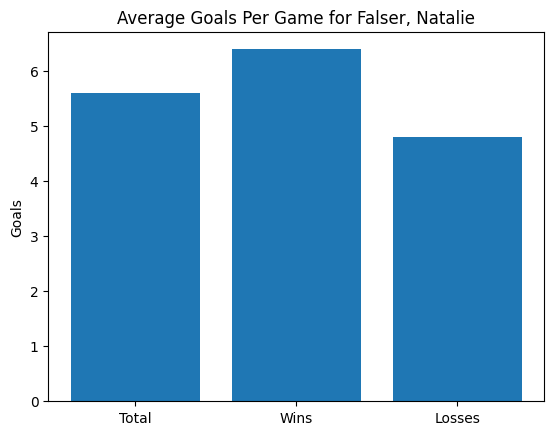

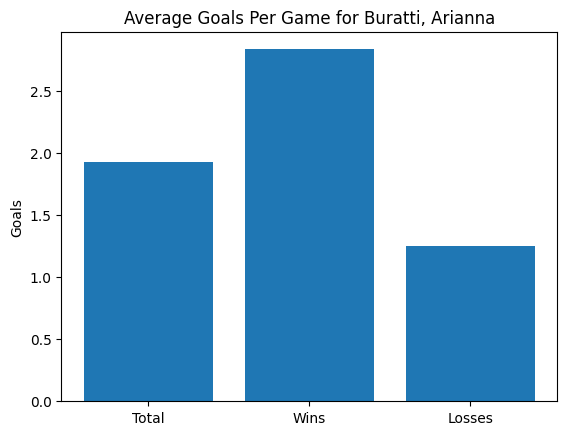

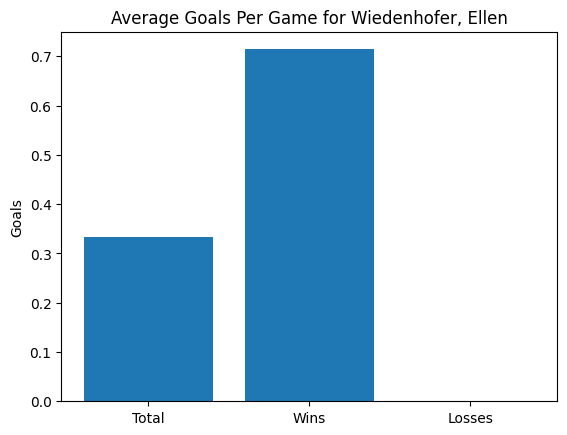

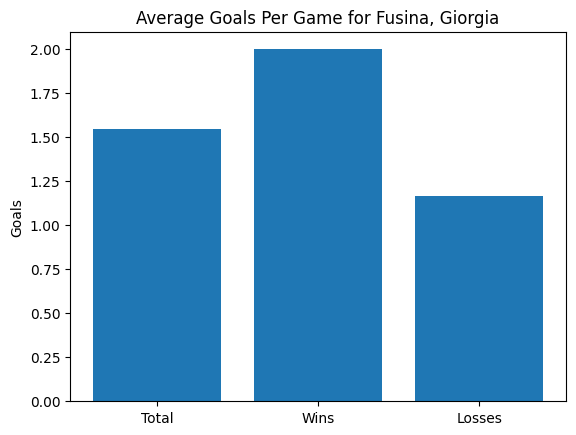

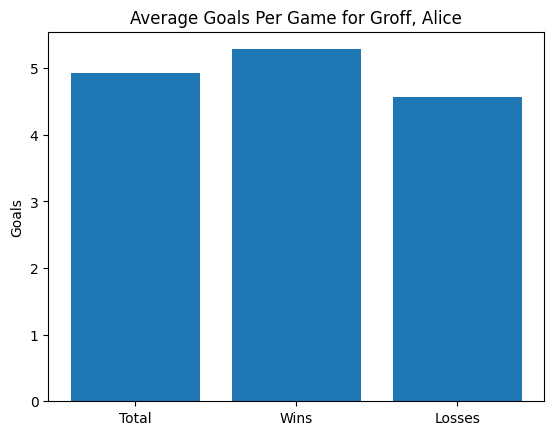

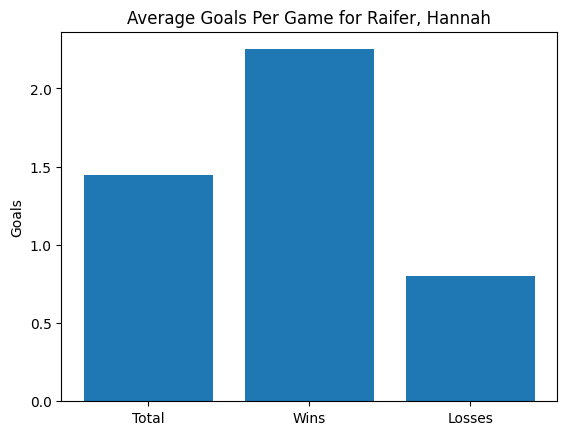

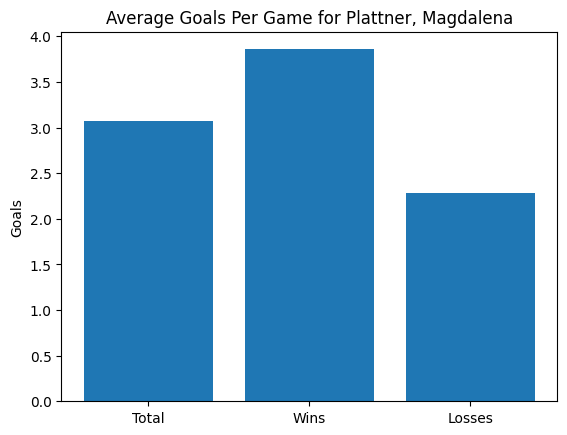

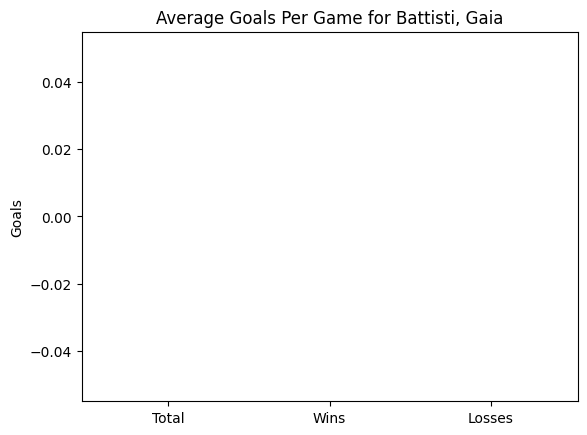

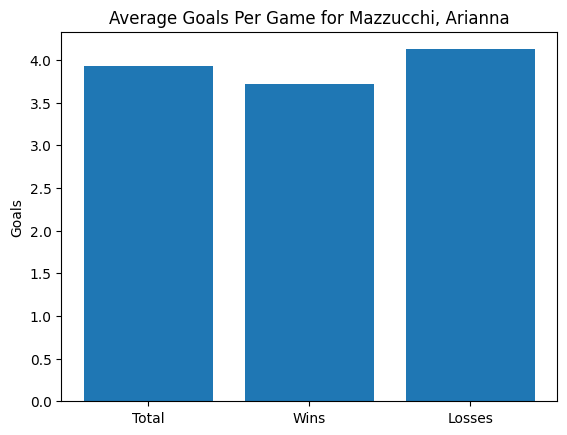

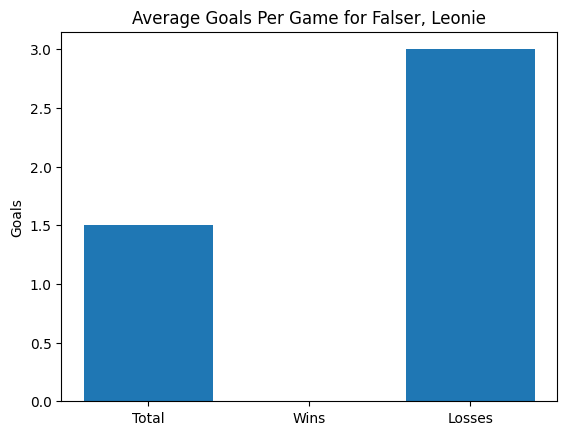

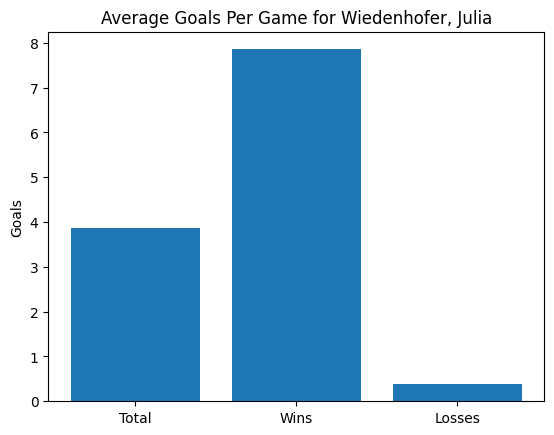

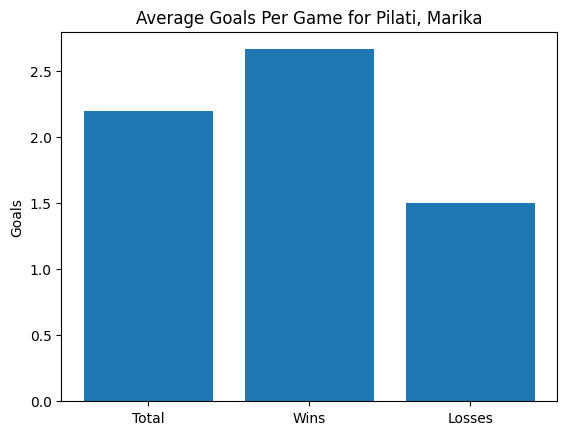

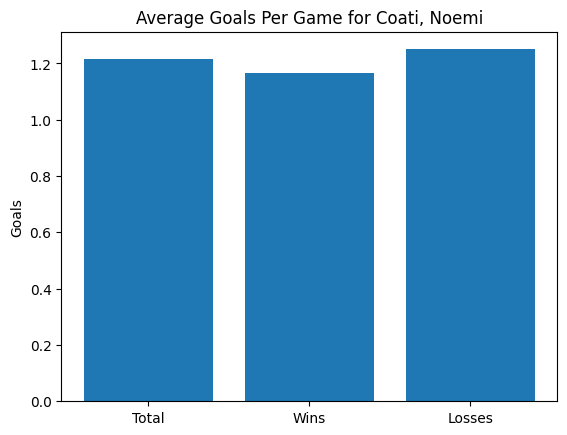

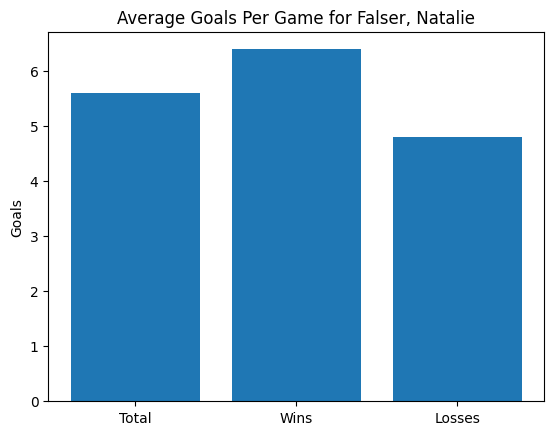

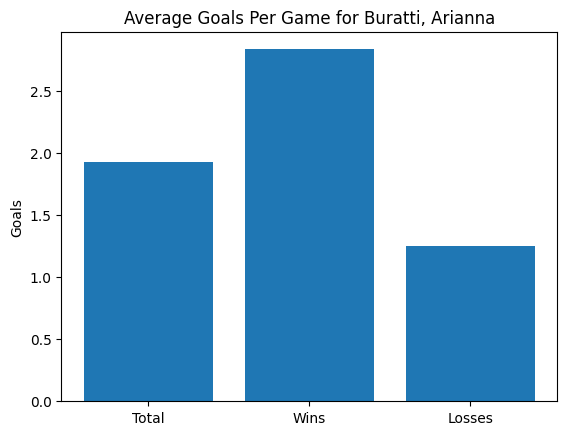

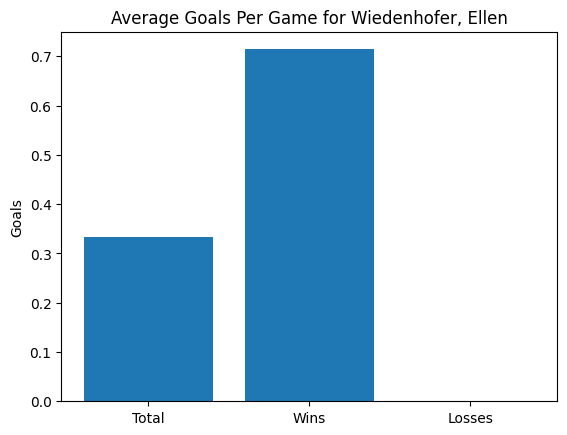

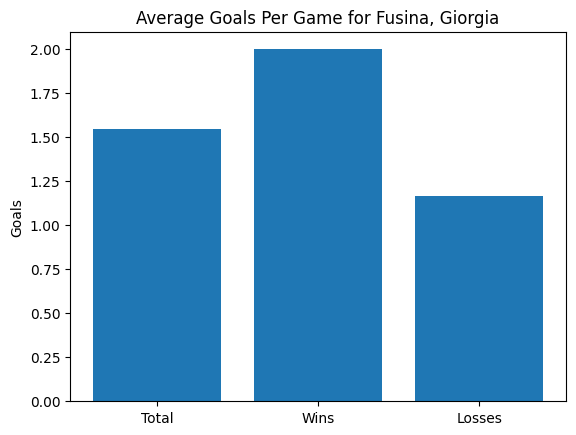

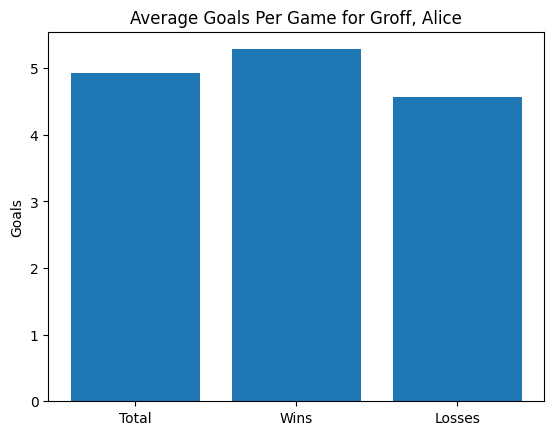

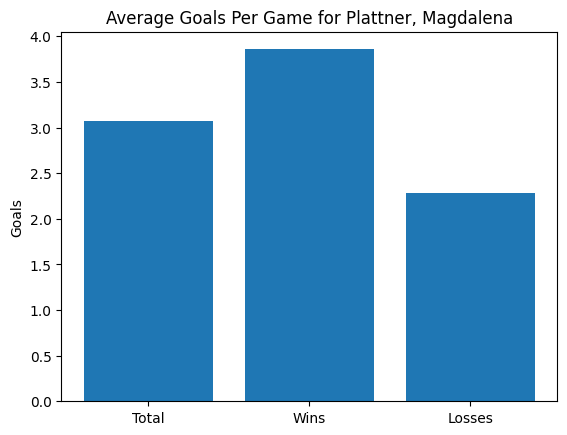

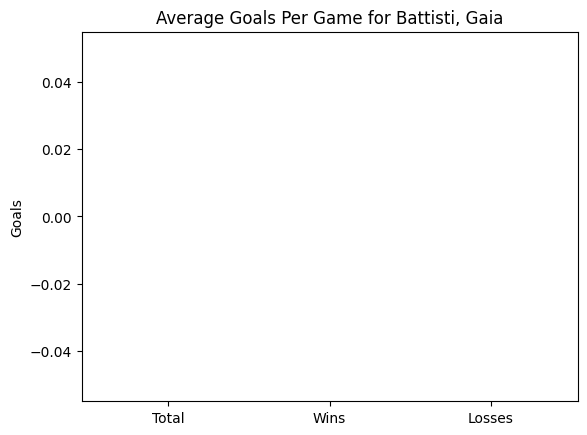

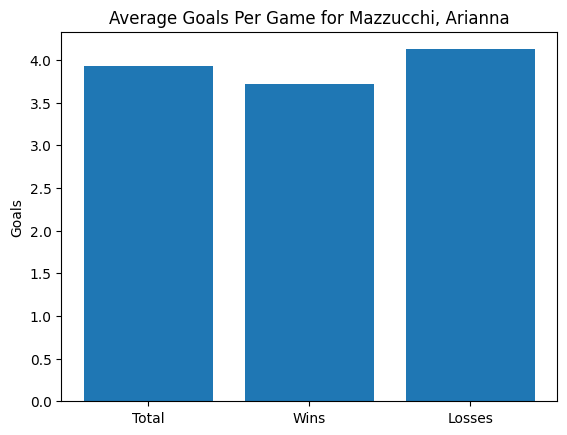

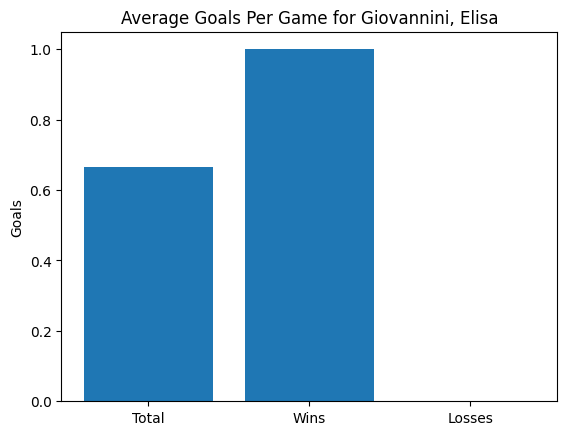

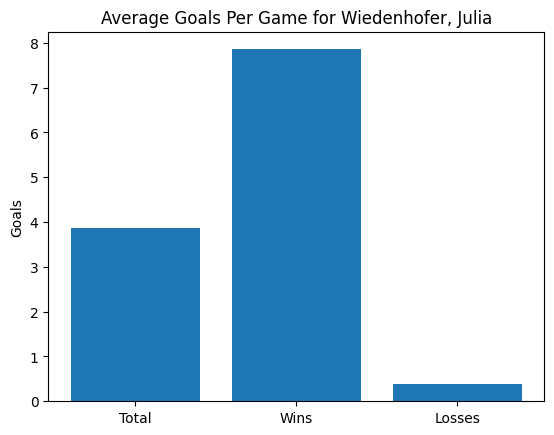

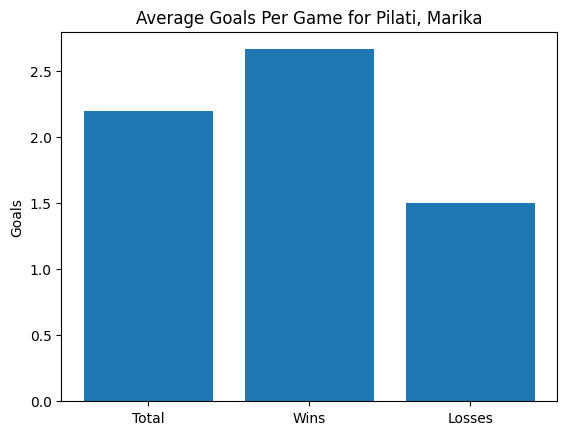

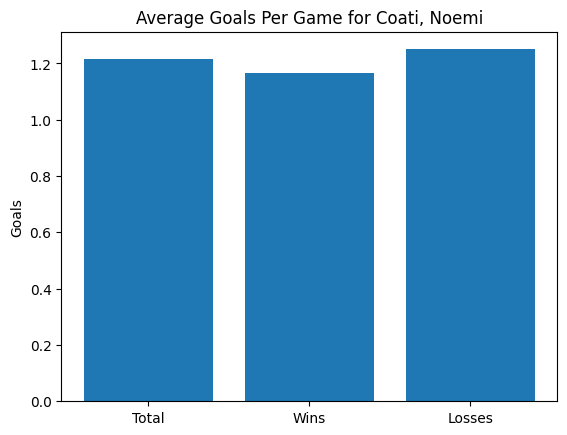

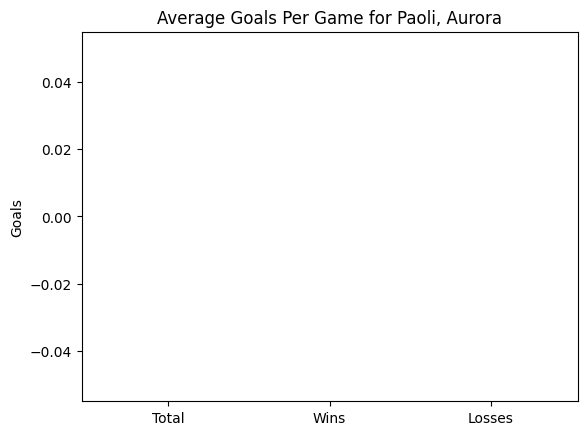

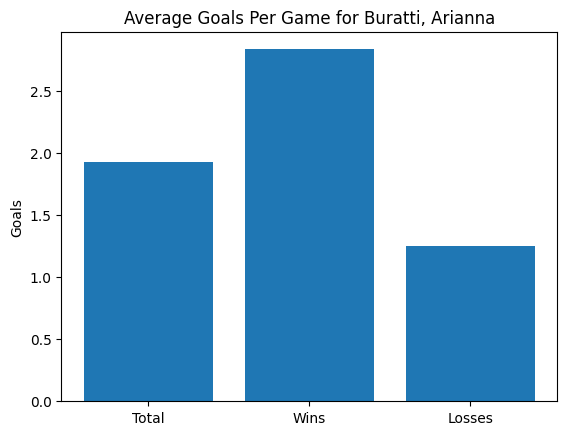

In [83]:
import sqlite3
import matplotlib.pyplot as plt

def display_team_players_stats(team_id):
    # Connect to the SQLite database
    conn = sqlite3.connect('fighDB.db')
    c = conn.cursor()

    # Retrieve the team name
    c.execute("SELECT team_name FROM Teams WHERE id=?", (team_id,))
    team_name = c.fetchone()
    if team_name is None:
        print("Team not found.")
        return

    # Retrieve the list of players for the team
    c.execute("SELECT name FROM Players WHERE team_id=?", (team_id,))
    players = c.fetchall()

    if not players:
        print(f"No players found for team '{team_name[0]}'")
        return

    print(f"Players for team '{team_name[0]}':")
    for player in players:
        player_name = player[0]
        # Retrieve player's goals per game
        c.execute('''
            SELECT game_id, goals
            FROM Players
            WHERE team_id=? AND name=?
        ''', (team_id, player_name))
        goals_per_game = c.fetchall()

        # Retrieve player's goals per game when the team wins
        c.execute('''
            SELECT p.game_id, p.goals
            FROM Players p
            INNER JOIN Games g ON p.game_id = g.id
            WHERE p.team_id=? AND p.name=? AND ((g.home_team_id=? AND g.home_goals > g.away_goals) OR (g.away_team_id=? AND g.away_goals > g.home_goals))
        ''', (team_id, player_name, team_name[0], team_name[0]))
        goals_per_game_wins = c.fetchall()

        # Retrieve player's goals per game when the team loses
        c.execute('''
            SELECT p.game_id, p.goals
            FROM Players p
            INNER JOIN Games g ON p.game_id = g.id
            WHERE p.team_id=? AND p.name=? AND ((g.home_team_id=? AND g.home_goals < g.away_goals) OR (g.away_team_id=? AND g.away_goals < g.home_goals))
        ''', (team_id, player_name, team_name[0], team_name[0]))
        goals_per_game_losses = c.fetchall()

        total_goals = sum(goal[1] for goal in goals_per_game)
        average_goals = total_goals / len(goals_per_game)

        total_goals_wins = sum(goal[1] for goal in goals_per_game_wins)
        average_goals_wins = total_goals_wins / len(goals_per_game_wins) if goals_per_game_wins else 0

        total_goals_losses = sum(goal[1] for goal in goals_per_game_losses)
        average_goals_losses = total_goals_losses / len(goals_per_game_losses) if goals_per_game_losses else 0

        plt.bar(['Total', 'Wins', 'Losses'], [average_goals, average_goals_wins, average_goals_losses])
        plt.title(f'Average Goals Per Game for {player_name}')
        plt.ylabel('Goals')
        plt.show()

    # Close the connection
    conn.close()

display_team_players_stats("MEZZOCORONASERIEA2FEMMINILE")  # Replace "A1" with the desired team ID


Poisson distribution Ipotesis

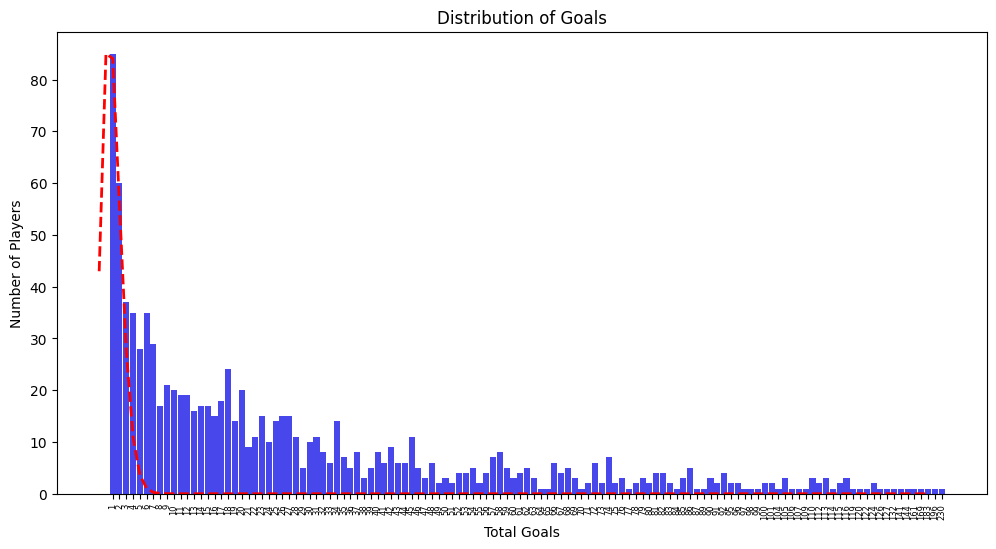

Text Version of Histogram:
1 goals: 85 players
2 goals: 60 players
3 goals: 37 players
4 goals: 35 players
5 goals: 28 players
6 goals: 35 players
7 goals: 29 players
8 goals: 17 players
9 goals: 21 players
10 goals: 20 players
11 goals: 19 players
12 goals: 19 players
13 goals: 16 players
14 goals: 17 players
15 goals: 17 players
16 goals: 15 players
17 goals: 18 players
18 goals: 24 players
19 goals: 14 players
20 goals: 20 players
21 goals: 9 players
22 goals: 11 players
23 goals: 15 players
24 goals: 10 players
25 goals: 14 players
26 goals: 15 players
27 goals: 15 players
28 goals: 11 players
29 goals: 5 players
30 goals: 10 players
31 goals: 11 players
32 goals: 8 players
33 goals: 6 players
34 goals: 14 players
35 goals: 7 players
36 goals: 5 players
37 goals: 8 players
38 goals: 3 players
39 goals: 5 players
40 goals: 8 players
41 goals: 6 players
42 goals: 9 players
43 goals: 6 players
44 goals: 6 players
45 goals: 11 players
46 goals: 5 players
47 goals: 3 players
48 goals: 6

In [ ]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

def load_data(db_path):
    # Connect to SQLite database
    conn = sqlite3.connect(db_path)
    
    # Convert SQLite table to a pandas dataframe
    df_players = pd.read_sql_query("SELECT * from Players", conn)
    
    # Filter out players with 0 goals
    df_players = df_players[df_players['goals'] != 0]

    return df_players, conn

def visualize_distribution(df_players):
    # Group players by the total number of goals and count the number of players in each group
    goals_distribution = df_players.groupby('id')['goals'].sum().value_counts().reset_index()
    goals_distribution.columns = ['Total Goals', 'Number of Players']

    # Sort the dataframe by the total number of goals
    goals_distribution = goals_distribution.sort_values('Total Goals')

    # Plot the distribution of goals with increased space between bars and wider bars
    plt.figure(figsize=(12, 6))
    sns.barplot(data=goals_distribution, x='Total Goals', y='Number of Players', color='blue', alpha=0.8, saturation=0.8, errorbar=None, width=0.9)

    plt.title('Distribution of Goals')
    plt.xlabel('Total Goals')
    plt.ylabel('Number of Players')

    # Rotate x-axis tick labels
    plt.xticks(rotation=90, fontsize=6)

    # Add a reference line for Poisson distribution
    max_goals = goals_distribution['Total Goals'].max()  # Maximum number of goals in a season
    max_players = goals_distribution['Number of Players'].max()  # Maximum number of players for a certain goal count
    mu = df_players['goals'].mean()  # Mean value for the Poisson distribution
    mu_adjusted = mu * 0.5  # Adjust the mean to make the Poisson curve less steep
    x = np.arange(0, max_goals + 1) - mu_adjusted  # Shift X values so that the peak of the Poisson curve is at 0
    y = poisson.pmf(x + mu_adjusted, mu_adjusted) * max_players  # Use adjusted mean for the Poisson distribution
    y = y / y.max() * max_players  # Scale the Poisson PMF so that its peak matches the peak of the histogram
    
    # Limit the x-values and y-values to match the last bar of the histogram
    x = x[:len(goals_distribution['Total Goals'])]
    y = y[:len(goals_distribution['Total Goals'])]
    
    # Find the x-value corresponding to the last bar of the histogram
    last_bar_x = goals_distribution['Total Goals'].values[-1]
    last_bar_index = np.where(x == last_bar_x)[0]
    if len(last_bar_index) == 0:
        last_bar_index = len(x)
    else:
        last_bar_index = last_bar_index[0]

    plt.plot(x[:last_bar_index], y[:last_bar_index], color='red', linestyle='--', linewidth=2)

    plt.show()

    # Print the text version of the histogram
    print("Text Version of Histogram:")
    for index, row in goals_distribution.iterrows():
        print(f"{row['Total Goals']} goals: {row['Number of Players']:,} players")

if __name__ == "__main__":
    db_path = 'fighDB.db'  # TODO: Replace with the path to your SQLite database

    df_players, conn = load_data(db_path)
    visualize_distribution(df_players)

    # Close the connection
    conn.close()


1/x

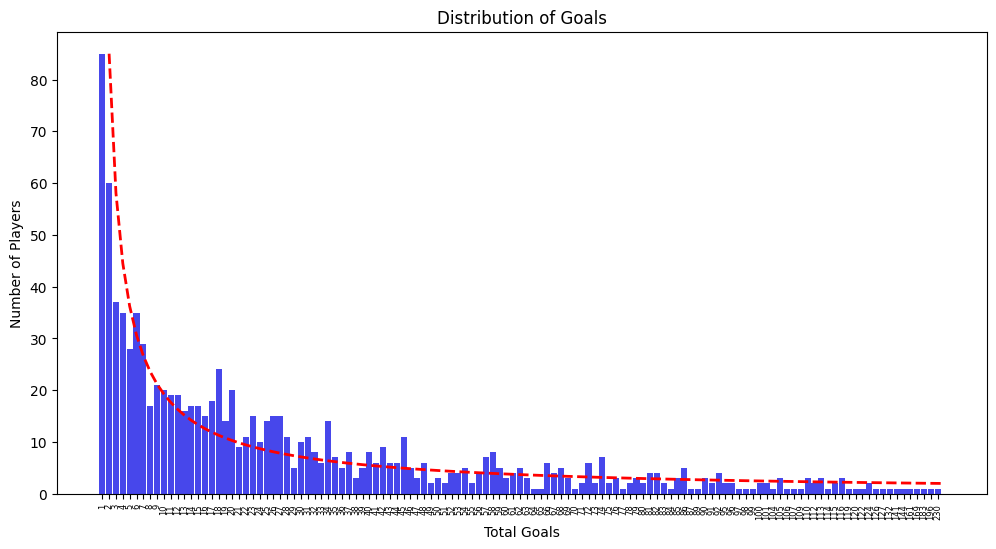

Text Version of Histogram:
1 goals: 85 players
2 goals: 60 players
3 goals: 37 players
4 goals: 35 players
5 goals: 28 players
6 goals: 35 players
7 goals: 29 players
8 goals: 17 players
9 goals: 21 players
10 goals: 20 players
11 goals: 19 players
12 goals: 19 players
13 goals: 16 players
14 goals: 17 players
15 goals: 17 players
16 goals: 15 players
17 goals: 18 players
18 goals: 24 players
19 goals: 14 players
20 goals: 20 players
21 goals: 9 players
22 goals: 11 players
23 goals: 15 players
24 goals: 10 players
25 goals: 14 players
26 goals: 15 players
27 goals: 15 players
28 goals: 11 players
29 goals: 5 players
30 goals: 10 players
31 goals: 11 players
32 goals: 8 players
33 goals: 6 players
34 goals: 14 players
35 goals: 7 players
36 goals: 5 players
37 goals: 8 players
38 goals: 3 players
39 goals: 5 players
40 goals: 8 players
41 goals: 6 players
42 goals: 9 players
43 goals: 6 players
44 goals: 6 players
45 goals: 11 players
46 goals: 5 players
47 goals: 3 players
48 goals: 6

In [106]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def load_data(db_path):
    # Connect to SQLite database
    conn = sqlite3.connect(db_path)
    
    # Convert SQLite table to a pandas dataframe
    df_players = pd.read_sql_query("SELECT * from Players", conn)
    
    # Filter out players with 0 goals
    df_players = df_players[df_players['goals'] != 0]

    return df_players, conn

def visualize_distribution(df_players):
    # Group players by the total number of goals and count the number of players in each group
    goals_distribution = df_players.groupby('id')['goals'].sum().value_counts().reset_index()
    
    goals_distribution.columns = ['Total Goals', 'Number of Players']

    # Sort the dataframe by the total number of goals
    goals_distribution = goals_distribution.sort_values('Total Goals')

    # Plot the distribution of goals with increased space between bars and wider bars
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=goals_distribution, x='Total Goals', y='Number of Players', color='blue', alpha=0.8, saturation=0.8, errorbar=None, width=0.9)

    plt.title('Distribution of Goals')
    plt.xlabel('Total Goals')
    plt.ylabel('Number of Players')

    # Rotate x-axis tick labels
    plt.xticks(rotation=90, fontsize=6)  # Set the font size of x-axis tick labels

    # Add a reference line for 1/x distribution
    max_goals_histogram = goals_distribution['Total Goals'].iloc[-1]  # Maximum number of goals in the histogram
    max_players = goals_distribution['Number of Players'].max()  # Maximum number of players for a certain goal count
    x = np.arange(1, max_goals_histogram + 1)  # X values for the 1/x distribution
    a = 0.005  # This can be any non-zero positive value
    b = 0.9  # This controls the steepness of the curve; values less than 1 make the curve less steep
    y = a / (x + b)**b * max_players  # 1/x distribution with a steepness parameter
    y = y / y.max() * max_players  # Scale the 1/x distribution so that its peak matches the peak of the histogram

    # Limit the x-values and y-values to match the last bar of the histogram
    x = x[:len(goals_distribution)]
    y = y[:len(goals_distribution)]
    
    plt.plot(x, y, color='red', linestyle='--', linewidth=2)


    plt.show()

    # Print the text version of the histogram
    print("Text Version of Histogram:")
    for index, row in goals_distribution.iterrows():
        print(f"{row['Total Goals']} goals: {row['Number of Players']:,} players")

if __name__ == "__main__":
    db_path = 'fighDB.db'  # TODO: Replace with the path to your SQLite database

    df_players, conn = load_data(db_path)
    visualize_distribution(df_players)

    # Close the connection
    conn.close()


ALL CATEGORIES

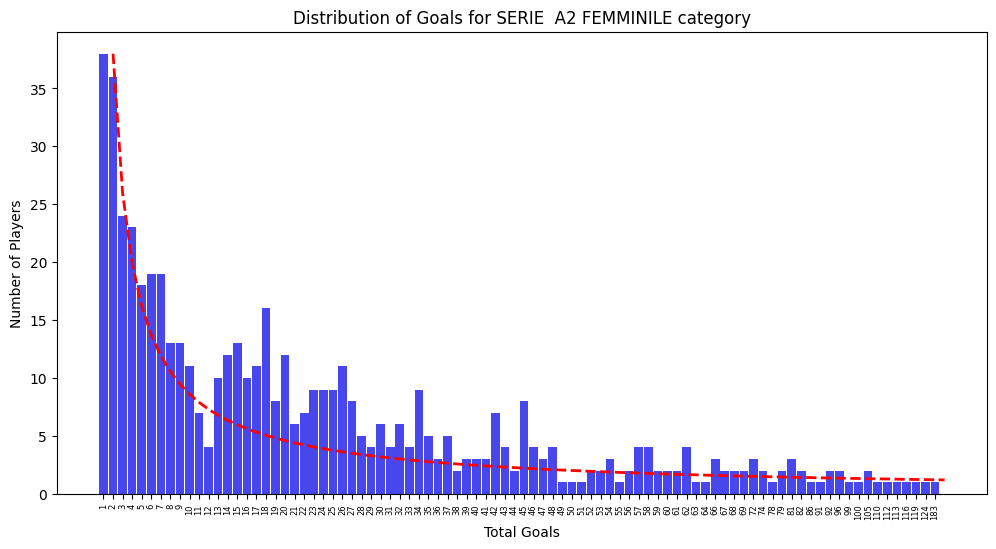

Text Version of Histogram for SERIE  A2 FEMMINILE category:
1 goals: 38 players
2 goals: 36 players
3 goals: 24 players
4 goals: 23 players
5 goals: 18 players
6 goals: 19 players
7 goals: 19 players
8 goals: 13 players
9 goals: 13 players
10 goals: 11 players
11 goals: 7 players
12 goals: 4 players
13 goals: 10 players
14 goals: 12 players
15 goals: 13 players
16 goals: 10 players
17 goals: 11 players
18 goals: 16 players
19 goals: 8 players
20 goals: 12 players
21 goals: 6 players
22 goals: 7 players
23 goals: 9 players
24 goals: 9 players
25 goals: 9 players
26 goals: 11 players
27 goals: 8 players
28 goals: 5 players
29 goals: 4 players
30 goals: 6 players
31 goals: 4 players
32 goals: 6 players
33 goals: 4 players
34 goals: 9 players
35 goals: 5 players
36 goals: 3 players
37 goals: 5 players
38 goals: 2 players
39 goals: 3 players
40 goals: 3 players
41 goals: 3 players
42 goals: 7 players
43 goals: 4 players
44 goals: 2 players
45 goals: 8 players
46 goals: 4 players
47 goals: 3

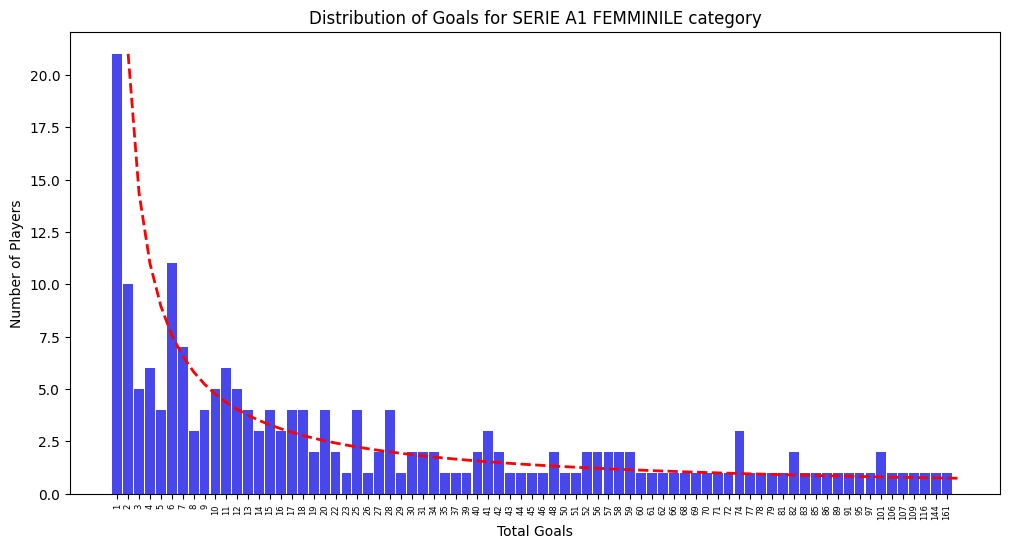

Text Version of Histogram for SERIE A1 FEMMINILE category:
1 goals: 21 players
2 goals: 10 players
3 goals: 5 players
4 goals: 6 players
5 goals: 4 players
6 goals: 11 players
7 goals: 7 players
8 goals: 3 players
9 goals: 4 players
10 goals: 5 players
11 goals: 6 players
12 goals: 5 players
13 goals: 4 players
14 goals: 3 players
15 goals: 4 players
16 goals: 3 players
17 goals: 4 players
18 goals: 4 players
19 goals: 2 players
20 goals: 4 players
22 goals: 2 players
23 goals: 1 players
25 goals: 4 players
26 goals: 1 players
27 goals: 2 players
28 goals: 4 players
29 goals: 1 players
30 goals: 2 players
31 goals: 2 players
34 goals: 2 players
35 goals: 1 players
37 goals: 1 players
39 goals: 1 players
40 goals: 2 players
41 goals: 3 players
42 goals: 2 players
43 goals: 1 players
44 goals: 1 players
45 goals: 1 players
46 goals: 1 players
48 goals: 2 players
50 goals: 1 players
51 goals: 1 players
52 goals: 2 players
56 goals: 2 players
57 goals: 2 players
58 goals: 2 players
59 goal

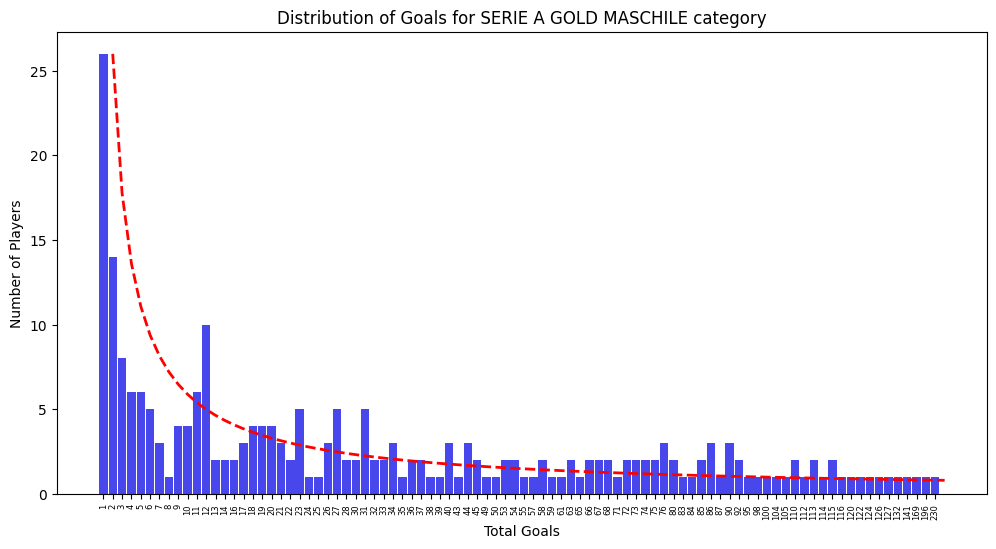

Text Version of Histogram for SERIE A GOLD MASCHILE category:
1 goals: 26 players
2 goals: 14 players
3 goals: 8 players
4 goals: 6 players
5 goals: 6 players
6 goals: 5 players
7 goals: 3 players
8 goals: 1 players
9 goals: 4 players
10 goals: 4 players
11 goals: 6 players
12 goals: 10 players
13 goals: 2 players
14 goals: 2 players
16 goals: 2 players
17 goals: 3 players
18 goals: 4 players
19 goals: 4 players
20 goals: 4 players
21 goals: 3 players
22 goals: 2 players
23 goals: 5 players
24 goals: 1 players
25 goals: 1 players
26 goals: 3 players
27 goals: 5 players
28 goals: 2 players
30 goals: 2 players
31 goals: 5 players
32 goals: 2 players
33 goals: 2 players
34 goals: 3 players
35 goals: 1 players
36 goals: 2 players
37 goals: 2 players
38 goals: 1 players
39 goals: 1 players
40 goals: 3 players
43 goals: 1 players
44 goals: 3 players
45 goals: 2 players
49 goals: 1 players
50 goals: 1 players
53 goals: 2 players
54 goals: 2 players
55 goals: 1 players
57 goals: 1 players
58 g

In [ ]:
def load_data(db_path):
    # Connect to SQLite database
    conn = sqlite3.connect(db_path)
    
    # Convert SQLite tables to pandas dataframes
    df_players = pd.read_sql_query("SELECT * from Players", conn)
    df_teams = pd.read_sql_query("SELECT id, category from Teams", conn)
    
    # Filter out players with 0 goals
    df_players = df_players[df_players['goals'] != 0]
    
    # Merge player and team dataframes on team_id
    df = pd.merge(df_players, df_teams, left_on='team_id', right_on='id', suffixes=('_player', '_team'))

    return df, conn

def visualize_distribution(df):
    categories = df['category'].unique()
    for category in categories:
        df_category = df[df['category'] == category]

        # Group players by the total number of goals and count the number of players in each group
        goals_distribution = df_category.groupby('id_player')['goals'].sum().value_counts().reset_index()
        
        goals_distribution.columns = ['Total Goals', 'Number of Players']

        # Sort the dataframe by the total number of goals
        goals_distribution = goals_distribution.sort_values('Total Goals')

        # Plot the distribution of goals with increased space between bars and wider bars
        plt.figure(figsize=(12, 6))
        ax = sns.barplot(data=goals_distribution, x='Total Goals', y='Number of Players', color='blue', alpha=0.8, saturation=0.8, errorbar=None, width=0.9)

        plt.title(f'Distribution of Goals for {category} category')
        plt.xlabel('Total Goals')
        plt.ylabel('Number of Players')

        # Rotate x-axis tick labels
        plt.xticks(rotation=90, fontsize=6)  # Set the font size of x-axis tick labels

        # Add a reference line for 1/x distribution
        max_goals_histogram = goals_distribution['Total Goals'].iloc[-1]  # Maximum number of goals in the histogram
        max_players = goals_distribution['Number of Players'].max()  # Maximum number of players for a certain goal count
        x = np.arange(1, max_goals_histogram + 1)  # X values for the 1/x distribution
        a = 0.005  # This can be any non-zero positive value
        b = 0.9  # This controls the steepness of the curve; values less than 1 make the curve less steep
        y = a / (x + b)**b * max_players  # 1/x distribution with a steepness parameter
        y = y / y.max() * max_players  # Scale the 1/x distribution so that its peak matches the peak of the histogram

        # Limit the x-values and y-values to match the last bar of the histogram
        x = x[:len(goals_distribution)]
        y = y[:len(goals_distribution)]
        
        plt.plot(x, y, color='red', linestyle='--', linewidth=2)

        plt.show()

        # Print the text version of the histogram
        print("Text Version of Histogram for", category, "category:")
        for index, row in goals_distribution.iterrows():
            print(f"{row['Total Goals']} goals: {row['Number of Players']:,} players")
            
if __name__ == "__main__":
    db_path = 'fighDB.db'  # TODO: Replace with the path to your SQLite database

    df, conn = load_data(db_path)
    visualize_distribution(df)

    # Close the connection
    conn.close()
